# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-и-изменение-типа-данных" data-toc-modified-id="Обработка-пропусков-и-изменение-типа-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков и изменение типа данных</a></span><ul class="toc-item"><li><span><a href="#Столбец-'total_images'" data-toc-modified-id="Столбец-'total_images'-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Столбец 'total_images'</a></span></li><li><span><a href="#Столбец-'last_price'" data-toc-modified-id="Столбец-'last_price'-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Столбец 'last_price'</a></span></li><li><span><a href="#Столбец-'total_area'" data-toc-modified-id="Столбец-'total_area'-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Столбец 'total_area'</a></span></li><li><span><a href="#Столбец-'first_day_exposition'" data-toc-modified-id="Столбец-'first_day_exposition'-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Столбец 'first_day_exposition'</a></span></li><li><span><a href="#Столбец-'rooms'" data-toc-modified-id="Столбец-'rooms'-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Столбец 'rooms'</a></span></li><li><span><a href="#Столбец-'ceiling_height'" data-toc-modified-id="Столбец-'ceiling_height'-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Столбец 'ceiling_height'</a></span></li><li><span><a href="#Столбец-'floors_total'" data-toc-modified-id="Столбец-'floors_total'-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Столбец 'floors_total'</a></span></li><li><span><a href="#Столбец-'floor'" data-toc-modified-id="Столбец-'floor'-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Столбец 'floor'</a></span></li><li><span><a href="#Столбец-'is_apartment'" data-toc-modified-id="Столбец-'is_apartment'-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>Столбец 'is_apartment'</a></span></li><li><span><a href="#Столбец-'studio'" data-toc-modified-id="Столбец-'studio'-2.1.10"><span class="toc-item-num">2.1.10&nbsp;&nbsp;</span>Столбец 'studio'</a></span></li><li><span><a href="#Столбец-'open_plan'" data-toc-modified-id="Столбец-'open_plan'-2.1.11"><span class="toc-item-num">2.1.11&nbsp;&nbsp;</span>Столбец 'open_plan'</a></span></li><li><span><a href="#Столбец-'balcony'" data-toc-modified-id="Столбец-'balcony'-2.1.12"><span class="toc-item-num">2.1.12&nbsp;&nbsp;</span>Столбец 'balcony'</a></span></li><li><span><a href="#Столбец-'locality_name'" data-toc-modified-id="Столбец-'locality_name'-2.1.13"><span class="toc-item-num">2.1.13&nbsp;&nbsp;</span>Столбец 'locality_name'</a></span></li><li><span><a href="#Столбец-'living_area'-и-'kitchen_area'" data-toc-modified-id="Столбец-'living_area'-и-'kitchen_area'-2.1.14"><span class="toc-item-num">2.1.14&nbsp;&nbsp;</span>Столбец 'living_area' и 'kitchen_area'</a></span></li><li><span><a href="#Столбец--'days_exposition'" data-toc-modified-id="Столбец--'days_exposition'-2.1.15"><span class="toc-item-num">2.1.15&nbsp;&nbsp;</span>Столбец  'days_exposition'</a></span></li><li><span><a href="#Столбцы-'airports_nearest',-'cityCenters_nearest',-'parks_around3000',-'parks_nearest-ponds_around3000',-'ponds_nearest'" data-toc-modified-id="Столбцы-'airports_nearest',-'cityCenters_nearest',-'parks_around3000',-'parks_nearest-ponds_around3000',-'ponds_nearest'-2.1.16"><span class="toc-item-num">2.1.16&nbsp;&nbsp;</span>Столбцы 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest ponds_around3000', 'ponds_nearest'</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-2.1.17"><span class="toc-item-num">2.1.17&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Результат-предобработки-данных" data-toc-modified-id="Результат-предобработки-данных-2.1.18"><span class="toc-item-num">2.1.18&nbsp;&nbsp;</span>Результат предобработки данных</a></span></li></ul></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Цена-квадратного-метра" data-toc-modified-id="Цена-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена квадратного метра</a></span></li><li><span><a href="#День-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="День-недели,-месяц-и-год-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели, месяц и год публикации объявления</a></span></li><li><span><a href="#Этаж-квартиры;-варианты-—-первый,-последний,-другой" data-toc-modified-id="Этаж-квартиры;-варианты-—-первый,-последний,-другой-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Этаж квартиры; варианты — первый, последний, другой</a></span></li><li><span><a href="#Соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей" data-toc-modified-id="Соотношение-жилой-и-общей-площади,-а-также-отношение-площади-кухни-к-общей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Соотношение жилой и общей площади, а также отношение площади кухни к общей</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Зависимость-стоимости-от-различных-факторов" data-toc-modified-id="Зависимость-стоимости-от-различных-факторов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Зависимость стоимости от различных факторов</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади" data-toc-modified-id="Зависимость-цены-от-площади-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Зависимость цены от площади</a></span></li><li><span><a href="#Зависимость-цены-от-количества-комнат" data-toc-modified-id="Зависимость-цены-от-количества-комнат-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Зависимость цены от количества комнат</a></span></li><li><span><a href="#Зависимость-цены-от-удалённости-от-центра" data-toc-modified-id="Зависимость-цены-от-удалённости-от-центра-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Зависимость цены от удалённости от центра</a></span></li><li><span><a href="#Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом" data-toc-modified-id="Зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом</a></span></li><li><span><a href="#Изучите-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года." data-toc-modified-id="Изучите-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года.-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Изучите зависимость от даты размещения: дня недели, месяца и года.</a></span></li></ul></li><li><span><a href="#Анализ-по-населенным-пунктам" data-toc-modified-id="Анализ-по-населенным-пунктам-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ по населенным пунктам</a></span></li><li><span><a href="#Поиск-центральной-зоны" data-toc-modified-id="Поиск-центральной-зоны-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Поиск центральной зоны</a></span></li><li><span><a href="#Сравнение-центра-города-со-всеми-объявлениями-в-городе" data-toc-modified-id="Сравнение-центра-города-со-всеми-объявлениями-в-городе-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Сравнение центра города со всеми объявлениями в городе</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# отображение всех строк
pd.set_option('display.max_rows', None)

In [3]:
# открываем файл с данными, сохраняем в df, смотрим первые строки
df = pd.read_csv('real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# смотрим последние строки
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# общая информация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Вывод**

В таблице 22 столбца с разным типом данных. Согласно документации:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Все колонки описывают параметры продаваемой недвижимости: площадь, цена, этаж, сколько комнат, балконов, удалённость от центра, парков, водоёмов и аэропортов.

В таблице 23699 строк. В столбцах есть пропуски. Предварительно можно утверждать, что данных достаточно для решения поставленной задачи.

## Предобработка данных

### Обработка пропусков и изменение типа данных

In [6]:
# подсчёт пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` имеются пропуски, чтобы двигаться дальше, нужно устранить проблемы в данных.

Рассмотрим все столбцы по порядку.

#### Столбец 'total_images'

In [7]:
# Смотрим уникальные значения
df['total_images'].value_counts().sort_index(ascending=True)

0     1059
1      872
2      640
3      769
4      986
5     1301
6     1482
7     1521
8     1585
9     1725
10    1798
11    1362
12    1225
13    1015
14     986
15     948
16     761
17     650
18     642
19     603
20    1694
21      12
22       8
23      16
24       8
25       1
26       5
27       2
28       4
29       3
30       2
31       2
32       4
35       2
37       1
39       1
42       1
50       3
Name: total_images, dtype: int64

В столбце нет пропусков, тип данных целочисленный, каких-либо аномальных значений нет.

#### Столбец 'last_price' 

In [8]:
#для лучшего восприятия данных отключим научную нотацию чисел
pd.options.display.float_format = '{:.2f}'.format

In [9]:
# числовое описание столбца
df['last_price'].describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

Изменим тип данных на целочисленный.

In [10]:
# меняем тип данных
df['last_price'] = df['last_price'].astype('int')

In [11]:
# проверяем тип данных
df['last_price'].dtypes

dtype('int32')

По полученным данным видим, что в столбце есть сильно большое значение 763 миллиона и сильно маленькое значение 12190 рассмотрим данные детальнее.

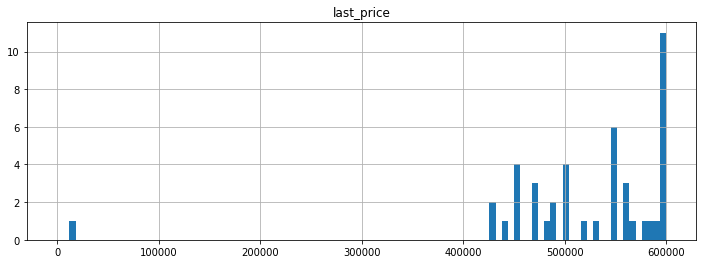

In [12]:
# смотрим на гистограмме как часто встречаются аномальные значения. 
df.hist('last_price', bins=100, figsize=(12,4), range=(0, 600000));

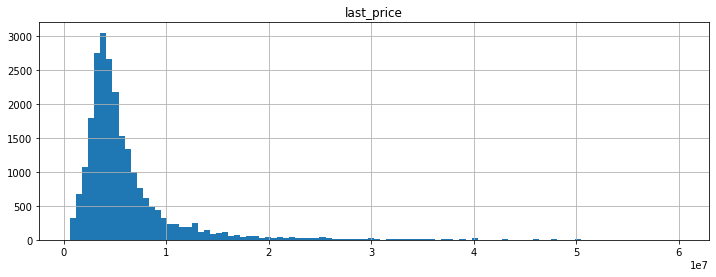

In [13]:
df.hist('last_price', bins=100, figsize=(12,4), range=(600000, 60000000));

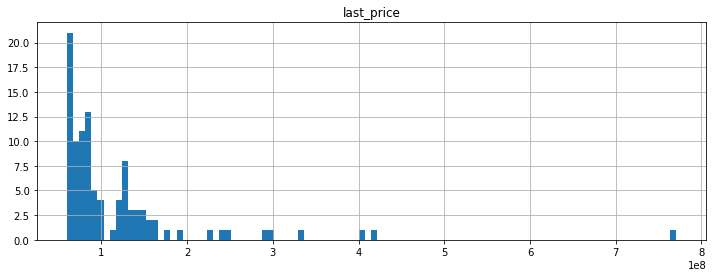

In [14]:
df.hist('last_price', bins=100, figsize=(12,4), range=(60000000, 770000000));

По графикам видим, что у нас имеются аномальные значения - выбросы. Их совсем  не много, но лучше будет их удалить, для того, чтобы иследование стало более точным. Оставим все, что >400тыс.руб и <300млн.р., остальное удалим.

In [15]:
# удаляем выбросы
df= df.loc[(df['last_price']>400000) & (df['last_price']<300000000)]
df.reset_index(inplace=True, drop=True)

In [16]:
# числовое описание столбца
df['last_price'].describe()

count       23693.00
mean      6449746.85
std       8517635.13
min        430000.00
25%       3400000.00
50%       4650000.00
75%       6799000.00
max     289238400.00
Name: last_price, dtype: float64

In [17]:
# смотрим сколько строк осталось
df.shape

(23693, 22)

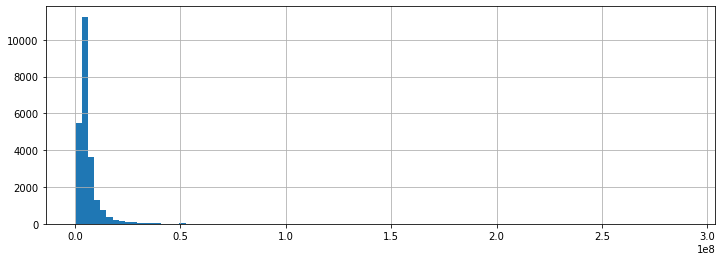

In [18]:
# смотрим общий график после удаления выбросов
df['last_price'].hist(figsize=(12,4), bins=100);

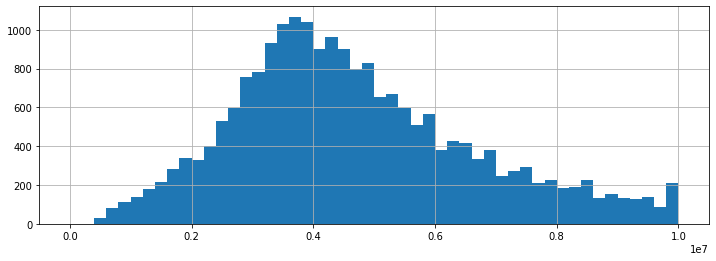

In [19]:
# смотрим квартиры стоимостью от 0 до 10 млн. 
df['last_price'].hist(range=(0,10000000),figsize=(12,4), bins=50);

Выбросы удалили, удалилось всего 6 строк, тип данных изменили - сделали его целочисленным. Пропусков в столбце нет.

По полученным данным видим, что больше всего квартир стоимостью примерно 3,8 млн. Чаще всего продаются квартиры по стоимости в диапозоне от 2 млн до 7 млн. 

#### Столбец 'total_area' 


In [20]:
# числовое описание столбца
df['total_area'].describe()

count   23693.00
mean       60.25
std        34.90
min        12.00
25%        40.00
50%        52.00
75%        69.80
max       631.20
Name: total_area, dtype: float64

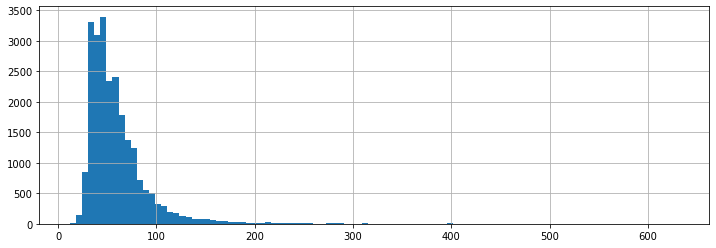

In [21]:
# смотрим общий график
df['total_area'].hist(figsize=(12,4), bins=100);

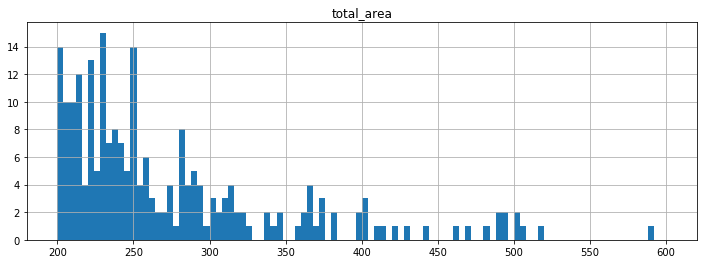

In [22]:
# смотрим квартиры площадью от 200 кв. метров до  600 
df.hist('total_area', bins=100, figsize=(12,4), range=(200, 600));

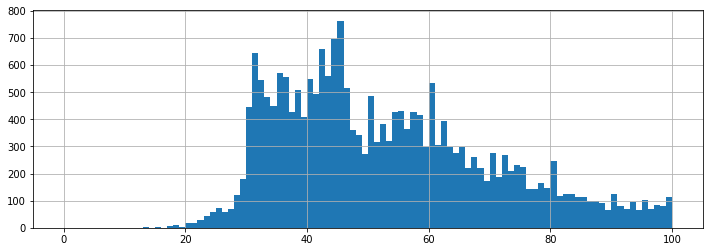

In [23]:
# смотрим квартиры площадью от 0 кв. метров до 100 
df['total_area'].hist(range=(0,100),figsize=(12,4), bins=100);

Аномальных значений не наблюдается, пропусков нет, со столбцом все в порядке он готов к дальнейшей работе. Тип данных не меняем, так как тут площадь  квартиры в кв. метрах.


Из полученных данных видим, что больше всего квартир с площадями 30-45 кв.м - это скорее всего 1 и 2 комнатные квартиры. Далее идут квартиры с площадью до 75 кв.м., скорее всего 3-4 комнатные квартиры. Также видим, что чем больше площадь, тем меньше квартир и, что квартиры меньше 30 кв.м тоже довольно редко встречаются. Вывод больше всего в продаже квартир общей площадь от 30-45 кв.м

#### Столбец 'first_day_exposition'

В столбце указана дата публикации объявления  о продаже квартиры, изменим тип данных на datetime. Пропусков в столбце нет. 

In [24]:
# меняем тип данных
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Тип данных изменили. По заданию нам необходимо добавить в таблицу три столбца с днем недели, месяцем и годом. Сделаем это ниже.

#### Столбец 'rooms'

In [25]:
# смотрим уникальные значения столбца
df['rooms'].value_counts().sort_index(ascending=True)

0      197
1     8047
2     7939
3     5813
4     1180
5      325
6      105
7       57
8       12
9        8
10       3
11       2
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Видим, что у нас есть значение "0" комнат, возможно так указали квартиры студии? Проверим это.

In [26]:
# смотрим сколько студий с "0" комнат
df.query('rooms == 0')['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

В 138 строках из 197  квартиры студии, у них всего 1 жилая комната без кухни, заменим значение "0", в таких квартирах на "1"

In [27]:
# меняем значение "0" комнтат в студиях на "1"
df.loc[(df['rooms']==0) & (df['studio']==True), 'rooms'] = 1

Осталось 59 строк  со значение "0" комнат, рассмотрим их по площади.

In [28]:
df.query('rooms == 0')['total_area'].value_counts().sort_index(ascending=True)

16.00     1
20.00     1
21.00     1
22.00     1
22.50     1
23.00     1
23.06     1
23.98     1
24.00     5
24.20     1
25.00     7
25.20     1
25.27     1
25.41     1
25.90     1
26.00     3
26.10     2
26.80     1
27.00     2
27.10     1
27.30     2
27.32     1
27.50     1
27.70     1
28.00     2
28.01     1
28.05     1
28.20     1
28.30     1
28.50     1
29.00     2
30.00     1
30.50     1
31.00     1
31.10     1
32.30     1
34.00     1
34.40     1
35.00     2
42.63     1
371.00    1
Name: total_area, dtype: int64

Видим, что у нас все значения не более 43 кв. метров - будем считать, что это однакомнатные квартиры, заменим в таких квартирах "0" на "1"

In [29]:
# меняем значение "0" на "1" в квартирах с площадью менее 43кв. метров.
df.loc[(df['rooms']==0) & (df['total_area']<43), 'rooms'] = 1

Также у нас есть 1 квартира 371 кв. метр, возможно опечатка рассмотрим  строку  детальнее.

In [30]:
# смотрим квартиру со значение "0" комнат  и площадью 371 кв. метр
df.query('rooms == 0 and total_area == 371')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19387,5,71000000,371.00,2018-07-26,0,3.57,7.00,nan,6,NaN,...,nan,nan,Санкт-Петербург,25257.00,6060.00,1.00,761.00,1.00,584.00,90.00


Квартира по стоимости дорогая, с высокими потолками, в многоэтажном доме, определить количество комнат по каким-либо параметрам  не возможно, удалим эту строку как аномальную.

In [31]:
# удаляем аномальную строку
df.drop(df.loc[(df['rooms']==0) & (df['total_area']==371)].index,inplace=True, axis=0)

In [32]:
# ещё раз проверяем уникальные значения
df['rooms'].value_counts()

1     8243
2     7939
3     5813
4     1180
5      325
6      105
7       57
8       12
9        8
10       3
14       2
11       2
15       1
19       1
16       1
Name: rooms, dtype: int64

In [33]:
# числовое описание столбца
df['rooms'].describe()

count   23692.00
mean        2.08
std         1.06
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

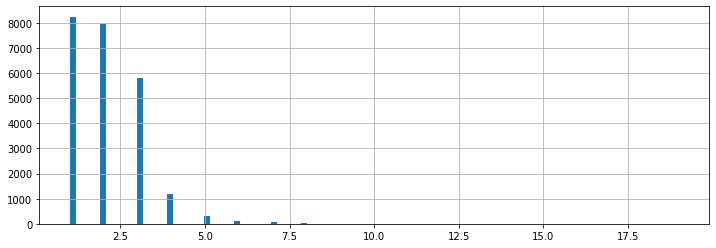

In [34]:
# Смотрим  график
df['rooms'].hist(figsize=(12,4), bins=100);

Видим, что самые популярные квартиры 1-2 комнатные, далее видим, что чем больше комнат, тем меньше таких  квартир.

Некорректное значение "0" заменили на  подходящее, удалили строку, в которой произвести замену не удалось, пропусков нет, со столбцом все в порядке он готов к дальнейшей работе.







#### Столбец 'ceiling_height'

In [35]:
#  смотрим уникальные значения
df['ceiling_height'].value_counts().sort_index(ascending=True)

1.00         1
1.20         1
1.75         1
2.00        11
2.20         1
2.25         1
2.30         4
2.34         1
2.40        23
2.45        15
2.46         2
2.47         3
2.48         8
2.49         1
2.50      3515
2.51        34
2.52        79
2.53        67
2.54        83
2.55       980
2.56       139
2.57       103
2.58        63
2.59        14
2.60      1646
2.61         5
2.62        14
2.63        13
2.64        81
2.65       676
2.66        17
2.67        36
2.68        23
2.69         2
2.70      1574
2.71        13
2.72        31
2.73        35
2.74        28
2.75       909
2.76        60
2.77        61
2.78        51
2.79        10
2.80       992
2.81         9
2.82        18
2.83        15
2.84        19
2.85       101
2.86         6
2.87        10
2.88        12
2.89         1
2.90       164
2.91         4
2.92         9
2.93         4
2.94         3
2.95        47
2.96         5
2.97         4
2.98         2
2.99         1
3.00      1112
3.01         6
3.02      

Из полученных данных видим, что у нас имеются  аномальные значения высоты потолков. Значение до 2 метров слишком малы,  стандарт потолков около 2,5 метров. Значения "1","1.2","1.75","10,3","14", "100"  не корректные, на опечатки не похожи, таких значений не много - всего по одному, удалим их. 

Также наблюдаются значения больше 20 метров, предположительно это опечатки и там где значение 20 - это 2 метра, 25 = 2,5 и т.д.  Расммотрим эти значения детальнее.

In [36]:
# смотрим срез некорректных значений
df.query('ceiling_height >= 20 and ceiling_height < 35')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.20,2018-07-12,2,25.00,5.00,32.00,2,False,...,nan,2.00,Гатчина,nan,nan,nan,nan,nan,nan,259.00
3147,14,2900000,75.00,2018-11-12,3,32.00,3.00,53.00,2,NaN,...,8.00,nan,Волхов,nan,nan,nan,nan,nan,nan,nan
4642,0,4300000,45.00,2018-02-01,2,25.00,9.00,30.00,2,NaN,...,7.00,1.00,Санкт-Петербург,12016.00,13256.00,1.00,658.00,1.00,331.00,181.00
4875,7,3000000,25.00,2017-09-27,1,27.00,25.00,17.00,17,NaN,...,nan,2.00,посёлок Мурино,nan,nan,nan,nan,nan,nan,28.00
5075,0,3850000,30.50,2018-10-03,1,24.00,5.00,19.50,1,True,...,5.50,nan,Санкт-Петербург,29686.00,8389.00,3.00,397.00,1.00,578.00,7.00
5245,0,2500000,54.00,2017-10-13,2,27.00,5.00,30.00,3,NaN,...,9.00,2.00,деревня Мины,nan,nan,nan,nan,nan,nan,540.00
5668,4,4400000,50.00,2017-08-08,2,26.00,9.00,21.30,3,NaN,...,7.00,2.00,Санкт-Петербург,28981.00,10912.00,1.00,305.00,0.00,nan,267.00
5806,17,8150000,80.00,2019-01-09,2,27.00,36.00,41.00,13,NaN,...,12.00,5.00,Санкт-Петербург,18732.00,20444.00,0.00,nan,3.00,80.00,38.00
6245,6,3300000,44.40,2019-03-25,2,25.00,5.00,31.30,5,NaN,...,5.70,nan,Кронштадт,68923.00,50649.00,1.00,417.00,2.00,73.00,nan
9377,5,3950000,42.00,2017-03-26,3,25.00,5.00,30.00,2,NaN,...,5.20,nan,Санкт-Петербург,11647.00,13581.00,0.00,nan,0.00,nan,nan


Судя по цене и площади, это больше похоже на обычные квартиры, поэтому лучше всего будет исправить предположительную опечатку на корректное значение. Поделим их на 10 

In [37]:
# делим некорректные значения на 10 
df.loc[df.query('ceiling_height >= 20 and ceiling_height < 35').index, 'ceiling_height'] = \
    df.loc[df.query('ceiling_height >= 20 and ceiling_height < 35').index, 'ceiling_height'] / 10

In [38]:
# удаляем значения "1","1.2","1.75","10,3","14", "100"
df.drop(df.query('ceiling_height < 2 or ceiling_height > 9').index, inplace=True, axis=0)
df.reset_index(inplace=True, drop=True)

In [39]:
# проверяем, смотрим уникальные значения
df['ceiling_height'].value_counts().sort_index(ascending=True)

2.00      12
2.20       1
2.25       1
2.26       1
2.30       4
2.34       1
2.40      24
2.45      15
2.46       2
2.47       3
2.48       8
2.49       1
2.50    3522
2.51      34
2.52      79
2.53      67
2.54      83
2.55     980
2.56     139
2.57     103
2.58      63
2.59      14
2.60    1647
2.61       5
2.62      14
2.63      13
2.64      81
2.65     676
2.66      17
2.67      36
2.68      23
2.69       2
2.70    1582
2.71      13
2.72      31
2.73      35
2.74      28
2.75     910
2.76      60
2.77      61
2.78      51
2.79      10
2.80     992
2.81       9
2.82      18
2.83      15
2.84      19
2.85     101
2.86       6
2.87      10
2.88      12
2.89       1
2.90     164
2.91       4
2.92       9
2.93       4
2.94       3
2.95      47
2.96       5
2.97       4
2.98       2
2.99       1
3.00    1112
3.01       6
3.02       8
3.03       4
3.04       6
3.05      46
3.06      11
3.07      11
3.08      14
3.09       4
3.10     203
3.11       7
3.12      17
3.13      11
3.14       7

Некорректные значения убрали, теперь остались пропуски, правильнее всего будет заменить пропуски медианным значением.

In [40]:
# меняем пропуски на медианное значение.
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [41]:
# проверяем количество пропусков
df['ceiling_height'].isna().sum()

0

In [42]:
# числовое описание столбца
df['ceiling_height'].describe()

count   23686.00
mean        2.70
std         0.23
min         2.00
25%         2.60
50%         2.65
75%         2.70
max         8.30
Name: ceiling_height, dtype: float64

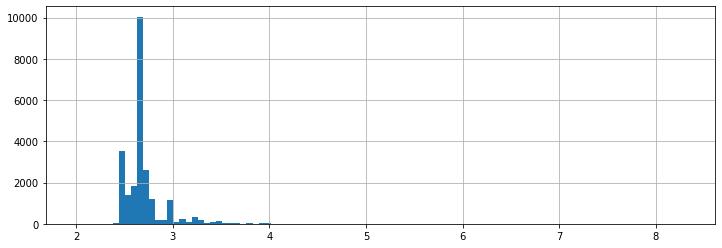

In [43]:
# смотрим график
df['ceiling_height'].hist(figsize=(12,4), bins=100);

Больше всего потолков в диапозоне от 2,5 до 3 метров, что соответствует стандарту потолков. Самое частое значение: 2,65 - это медианное значение,  мы им заменяли пропуски. Чем выше высота потолков, тем реже встречаются такие квартиры, также и квартиры с низкими потолками встречаются редко.

Аномальные значения в столбце удалили, предположительные опечатки исправили, пропуски заменили на медиану. Столбец готов к дальнейшей работе.

#### Столбец 'floors_total'

In [44]:
# смотрим уникальные значения
df['floors_total'].value_counts().sort_index(ascending=True)

1.00       25
2.00      382
3.00      668
4.00     1200
5.00     5787
6.00      914
7.00      589
8.00      390
9.00     3760
10.00    1173
11.00     203
12.00    1361
13.00     229
14.00     552
15.00     365
16.00    1375
17.00     833
18.00     505
19.00     339
20.00     271
21.00     158
22.00     286
23.00     352
24.00     469
25.00    1073
26.00     124
27.00     164
28.00      21
29.00       1
33.00       1
34.00       1
35.00      24
36.00       3
52.00       1
60.00       1
Name: floors_total, dtype: int64

In [45]:
# смотрим количество пропусков
df['floors_total'].isna().sum()

86

In [46]:
# вывели на экран строки с пропусками в столбце 'floors_total'
df[df['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.20,2018-10-02,2,2.65,nan,30.80,4,NaN,...,12.00,nan,Санкт-Петербург,39197.00,12373.00,1.00,123.00,0.00,nan,49.00
237,4,2438033,28.10,2016-11-23,1,2.65,nan,20.75,1,NaN,...,nan,0.00,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,251.00
457,4,9788348,70.80,2015-08-01,2,2.65,nan,38.40,12,NaN,...,10.63,0.00,Санкт-Петербург,37364.00,8322.00,2.00,309.00,2.00,706.00,727.00
671,4,6051191,93.60,2017-04-06,3,2.65,nan,47.10,8,NaN,...,16.80,0.00,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,123.00
1756,5,3600000,39.00,2017-04-22,1,2.65,nan,nan,9,NaN,...,nan,0.00,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,77.00
1929,1,9750000,66.77,2016-05-13,2,2.65,nan,nan,4,NaN,...,nan,0.00,Санкт-Петербург,39886.00,10660.00,1.00,2276.00,3.00,244.00,90.00
2391,7,5395770,53.00,2017-06-29,2,2.65,nan,29.00,22,NaN,...,9.00,0.00,Санкт-Петербург,43074.00,10820.00,0.00,nan,0.00,nan,48.00
2845,4,2325000,27.80,2016-09-21,1,2.65,nan,19.40,15,NaN,...,nan,0.00,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,307.00
2951,10,6500000,54.30,2019-04-23,1,2.65,nan,22.20,6,NaN,...,12.30,nan,Санкт-Петербург,23606.00,3148.00,0.00,nan,0.00,nan,nan
3030,9,6400000,56.70,2018-03-27,2,2.65,nan,32.00,12,NaN,...,12.00,nan,Кудрово,nan,nan,nan,nan,nan,nan,231.00


Для удобства изменим тип данных в столбце на целочисленный.

In [47]:
# Меняем тип данных
df['floors_total'] = df['floors_total'].astype('Int64')

Тип данных изменили. Пропущенных значений не много,  заменять их на какие-то дургие  не верно, этажность здания на основании других данных нам не узнать, оставим пропуски как есть.

#### Столбец 'floor'

In [48]:
# смотрим уникальные значения
df['floor'].value_counts().sort_index(ascending=True)

1     2916
2     3368
3     3073
4     2804
5     2616
6     1304
7     1217
8     1083
9     1050
10     686
11     523
12     526
13     379
14     337
15     342
16     315
17     227
18     178
19     147
20     110
21     125
22     113
23     100
24      63
25      44
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64

В столбце пропусков нет, каких-либо аномальных значений тоже нет.

 #### Столбец 'is_apartment'

In [49]:
# смотрим уникальные значения
df['is_apartment'].value_counts()

False    2724
True       49
Name: is_apartment, dtype: int64

In [50]:
# смотрим количество пропусков
df['is_apartment'].isna().sum()

20913

В столбце большое количество пропусков, скорее всего пропуски  это не апартаменты. Заменим пропуски в столбце на False

In [51]:
# меняем пропуски в столбце на False
df.loc[df['is_apartment'].isna(),'is_apartment'] = False

In [52]:
# проверяем количество пропусков
df['is_apartment'].isna().sum()

0

Пропуски заменили.

#### Столбец 'studio'

In [53]:
# смотрим уникальные значения
df['studio'].value_counts()

False    23537
True       149
Name: studio, dtype: int64

В столбце пропусков нет, каких-либо аномальных значений тоже нет.

#### Столбец 'open_plan'

In [54]:
# смотрим уникальные значения
df['open_plan'].value_counts()

False    23620
True        66
Name: open_plan, dtype: int64

В столбце пропусков нет, каких-либо аномальных значений тоже нет.

####  Столбец 'balcony'

In [55]:
# смотрим уникальные значения
df['balcony'].value_counts().sort_index(ascending=True)

0.00    3758
1.00    4195
2.00    3657
3.00      80
4.00     183
5.00     303
Name: balcony, dtype: int64

В столбце balcony указано количество балконов, вероятнее всего пропуски в этом столбце означают, что балконы не указаны, так как их нет. Заменим пропуски на ноль. И заменим тип данных на int

In [56]:
# заменям пропущенные значения на "0"
df['balcony'] = df['balcony'].fillna(0)

In [57]:
# проверяем количество пропусков
df['balcony'].isna().sum()

0

In [58]:
# меняем тип данных 
df['balcony'] = df['balcony'].astype('int')

In [59]:
# проверяем тип данных 
df['balcony'].dtypes

dtype('int32')

Пропуски заменили на "0", также изменили тип данных на целочисленный.

#### Столбец 'locality_name'

In [60]:
# смотрим количество пропусков
df['locality_name'].isna().sum()

49

In [61]:
# смотрим уникальные значения столбца
df['locality_name'].value_counts()

Санкт-Петербург                                            15709
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 178
Кудрово                                                      173
деревня Новое Девяткино                                      144
Сертолово                

 У слова поселок есть два варианта написания через "е" "ё", заменим  "ё"  на "е"

In [62]:
# заменяем "ё" на "е"
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

Определить местоположении квартиры  по имеющимся данным не возможно, поэтому заменим пропуски на "неизвестно"

In [63]:
# меняем пропуски
df['locality_name'] = df['locality_name'].fillna('неизвестно')

In [64]:
# проверяем пропуски
df['locality_name'].isna().sum()

0

Пропуски заменили на "неизвестно", заменили  разное написание слова  поселок на одинаковое.

#### Столбец 'living_area' и 'kitchen_area'

In [65]:
# смотрим количество пропусков
df['living_area'].isna().sum()

1902

In [66]:
# смотрим количество пропусков
df['kitchen_area'].isna().sum()

2275

В  квартирах студиях нет кухни, проверим есть ли в таких квартирах пропуски в столбце `living_area`

In [67]:
# числовое описание в студиях с жилой площадью
df.loc[df['studio']==True, 'living_area'].describe()

count   139.00
mean     19.00
std       7.35
min       2.00
25%      16.00
50%      18.00
75%      19.85
max      68.00
Name: living_area, dtype: float64

По полученным данным видим, что в студиях жилая площадь заполнена только в 139 строках, а их 149, значит в 10 строках есть пропуск, также видим, что у нас  есть  аномальное значение 2 кв. метра, рассмотрим его детальнее.

In [68]:
# смотрим строки в которых жилая площать меньше 10 кв. метров в студиях.
df.loc[df.loc[(df['living_area']<10) & (df['studio']==True),\
              ['living_area', 'total_area']].index, ['living_area', 'total_area']]

,living_area,total_area
17574,5.00,22.00
21748,2.00,23.00


Есть два аномальных значения жилой площади, возможно это опечатки,  узнать верные значения не возможно, поэтому лучше удалим эти строки.

In [69]:
# удаляем строки с анамальным значением жилой площади в студиях
df.drop(df.loc[df.loc[(df['living_area']<10) & (df['studio']==True),\
                      ['living_area', 'total_area']].index, ['living_area', 'total_area']].index,inplace=True, axis=0)

Теперь заполним пропуски  жилой площади в квартирах-студиях в соответствии со средним значением доли жилой площади к общей.

In [70]:
#  средняя доля жилой площади в студиях
living_area_studio = (df.loc[df['studio']==True, 'living_area'] / df.loc[df['studio']==True, 'total_area']).mean()

In [71]:
print("Средняя доля жилой площади в студях =", living_area_studio)

Средняя доля жилой площади в студях = 0.6891845871726122


In [72]:
# Меняем пропущенные значение жилой площади в студиях на = доля жилой площади*общую
df.loc[(df['living_area'].isna() == True) & (df['studio']==True), 'living_area'] = \
    df.loc[(df['living_area'].isna() == True) & (df['studio']==True), 'total_area'] * living_area_studio

In [73]:
# числовое описание столбца
df.loc[df['studio']==True, 'living_area'].describe()

count   147.00
mean     19.13
std       6.94
min      10.00
25%      16.00
50%      18.00
75%      19.95
max      68.00
Name: living_area, dtype: float64

In [74]:
# проверяем количество пропусков
df.loc[df['studio']==True, 'living_area'].isna().sum()

0

Пропуски  жилой площади в квартирах студиях заполнили,  анамальные значения удалили.

Теперь заполним пропуски медианными значениями "living_area" и "kitchen_area" в зависимости от "total_area", квартиры студии исключим так там мы уже заполнили пропуски

Для удобства сделаем отдельный датафрейм без студий

In [75]:
areas = pd.DataFrame(columns=['total','living', 'kitchen'])
areas['total'] = df.loc[(df['total_area'].isna() == False) & (df['studio']==False), 'total_area']
areas['living'] = df.loc[(df['living_area'].isna() == False) & (df['studio']==False), 'living_area']
areas['kitchen'] = df.loc[(df['kitchen_area'].isna() == False) & (df['studio']==False), 'kitchen_area']
areas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23537 entries, 0 to 23685
Data columns (total 3 columns):
total      23537 non-null float64
living     21645 non-null float64
kitchen    21411 non-null float64
dtypes: float64(3)
memory usage: 735.5 KB


Рассчитаем медианное значение доли кухни и жилой в общей площади а также добавим долю оставшейся площади (нежилая площадь = part_other)

In [76]:
# медиана долей кухонной площади к общей
part_kitchen_median = (areas['kitchen'] / areas['total']).median()
print("Медиана долей кухонной площади к общей =", part_kitchen_median)

# медиана долей жилой площади к общей
part_living_median = (areas['living'] / areas['total']).median()
print("Медиана долей жилой площади к общей =", part_living_median)

Медиана долей кухонной площади к общей = 0.1724137931034483
Медиана долей жилой площади к общей = 0.567219152854512


In [77]:
# медиана долей нежилой площади
part_other = 1 - part_living_median - part_kitchen_median
print('Медиана долей нежилой площади =',part_other)

Медиана долей нежилой площади = 0.26036705404203975


Заполним пропуски в столбцах кухня и жилая значениями = медиана соответствующих долей x общую.
Начнем с кухни.

In [78]:
# Индексы где пропуски в значениях 'kitchen_area'
index_insa_kitchen = df.loc[(df['kitchen_area'].isna() == True) & (df['studio']==False)].index

# Меняем пропуски
df.loc[index_insa_kitchen, 'kitchen_area'] = part_kitchen_median * df.loc[index_insa_kitchen, 'total_area']

In [79]:
# проверяем количество пропусков
df['kitchen_area'].isna().sum()

147

Осталось 147 пропусков в столбце, что равно количеству квартир студий.

In [80]:
# Индексы где пропуски в значениях 'living_area'
index_insa_living = df.loc[(df['living_area'].isna() == True) & (df['studio']==False)].index

# Меняем пропуски
df.loc[index_insa_living, 'living_area'] = part_living_median * df.loc[index_insa_living, 'total_area']

In [81]:
# проверяем количество пропусков
df['living_area'].isna().sum()

0

Пропуски в столбцах заполнили, посмотрим есть ли там аномальные значения.

In [82]:
# числовое описание столбца
df['living_area'].describe()

count   23684.00
mean       34.53
std        22.06
min         2.00
25%        19.00
50%        30.00
75%        42.10
max       409.00
Name: living_area, dtype: float64

In [83]:
# числовое описание столбца
df['kitchen_area'].describe()

count   23537.00
mean       10.51
std         5.95
min         1.30
25%         7.00
50%         9.00
75%        12.00
max       107.00
Name: kitchen_area, dtype: float64

Итак видим, что у нас есть слишком маленькие значения в `living_area` - 2.0  и в `kitchen_area` - 1.3. Рассмотрим детальнее.

In [84]:
# смотрим уникальные значения
df['living_area'].value_counts().sort_index(ascending=True)

2.00        1
3.00        2
5.40        1
6.00        1
6.50        1
7.37        2
7.49        1
8.00        2
8.30        1
8.40        1
8.50        1
8.51        2
8.90        1
9.00        9
9.10        1
9.76        1
9.80        1
10.00      33
10.08       2
10.21       1
10.30       2
10.40       3
10.49       1
10.50       5
10.52       1
10.55       1
10.60       2
10.70       2
10.76       1
10.80       1
10.90       2
10.93       1
10.94       1
11.00      24
11.10       2
11.15       1
11.20       2
11.30       3
11.34       2
11.38       1
11.40       4
11.40       1
11.47       1
11.50       5
11.60       2
11.70       3
11.79       1
11.88       1
11.90       1
11.99       1
12.00      33
12.08       1
12.10       3
12.18       1
12.20       3
12.28       1
12.30       3
12.37       1
12.48       3
12.50       9
12.60       2
12.70       3
12.71       1
12.76       1
12.79       1
12.80       2
12.81       1
12.90       1
13.00      42
13.05       4
13.05       1
13.09 

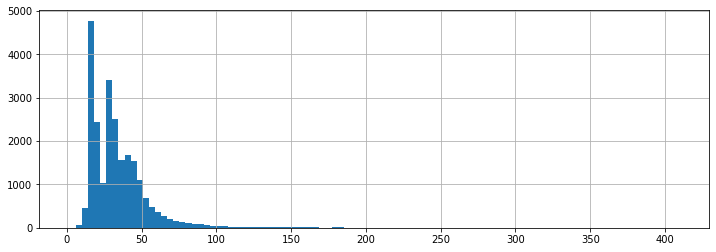

In [85]:
# смотрим общий график
df['living_area'].hist(figsize = (12,4), bins = 100);

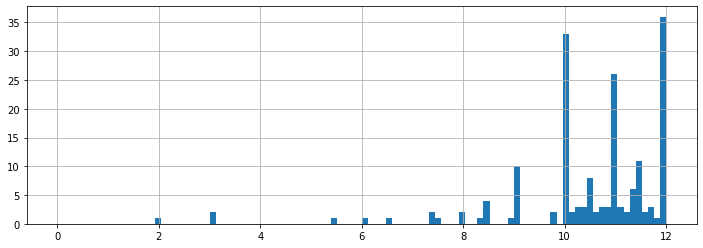

In [86]:
# смотрим квартиры жилой площадью до 12 кв. метров
df['living_area'].hist(figsize = (12,4), bins = 100, range = (0,12));

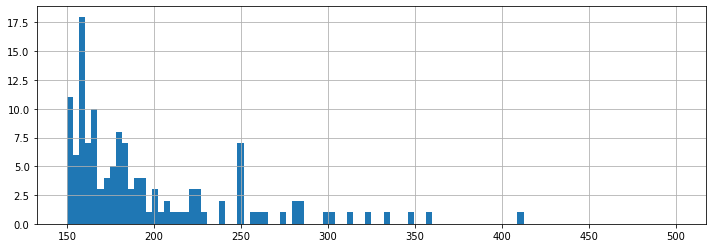

In [87]:
# смотрим квартиры жилой площадью от 150 кв. метров
df['living_area'].hist(figsize = (12,4), bins = 100, range = (150,500));

Видим, что у нас имеются  квартиры с очень маленькой жилой площадью меньше 6 кв. метров, что не похоже на квартиру, предположительно это некорректные значения, рассмотрим их детальнее - скорее всего их правильнее будет удалить.

In [88]:
# срез маленьких по  жилой площади квартир
df.query('living_area < 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3241,7,4440000,41.00,2017-07-02,1,2.65,17,3.00,17,False,...,11.00,0,Санкт-Петербург,19272.00,13073.00,0.00,nan,0.00,nan,216.00
13911,20,6350000,52.00,2018-02-06,2,3.00,6,2.00,2,False,...,9.00,0,Санкт-Петербург,32453.00,6521.00,0.00,nan,1.00,1012.00,91.00
21933,15,6100000,77.60,2019-02-28,4,2.50,9,5.40,1,False,...,9.80,0,Санкт-Петербург,29338.00,11270.00,1.00,584.00,0.00,nan,33.00
23561,14,64990000,139.00,2015-11-24,3,3.00,8,3.00,8,False,...,16.00,1,Санкт-Петербург,33255.00,5975.00,1.00,630.00,3.00,100.00,280.00


Попробуем заменить некорректные значения жилой площади, на основании остальных данных общей площади, площади кухни и  медианной доли нежилой площади.

In [89]:
# меняем некорректную жилую площадь на подходящую 
df.loc[df['living_area'] < 6, 'living_area'] = df['total_area'] - df['kitchen_area'] - df['total_area']*part_other

Для удобства округлим значения в столбце до десятых

In [90]:
# округляем значения до десятых
df['living_area'] = round(df['living_area'],1)

In [91]:
# числовое описание столбца
df['living_area'].describe()

count   23684.00
mean       34.54
std        22.05
min         6.00
25%        19.00
50%        30.00
75%        42.10
max       409.00
Name: living_area, dtype: float64

In [92]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,поселок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.20,9,False,...,27.41,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [93]:
# смотрим уникальные значение
df['kitchen_area'].value_counts().sort_index(ascending=True)

1.30         1
2.00         7
2.07         1
2.24         3
2.28         1
2.30         1
2.40         1
2.59         2
2.76         1
2.89         1
2.97         1
3.00         7
3.03         1
3.07         1
3.10         3
3.19         1
3.20         1
3.26         1
3.30         1
3.40         1
3.45         4
3.47         1
3.50         4
3.55         1
3.56         1
3.59         1
3.62         1
3.67         1
3.69         2
3.70         1
3.72         1
3.72         1
3.74         1
3.76         1
3.77         1
3.78         1
3.79         9
3.80         3
3.88         3
3.91         2
3.97        10
3.98         1
3.99         1
4.00        25
4.02         2
4.05         1
4.06         1
4.07         1
4.08         1
4.09         1
4.10         3
4.13         2
4.14        16
4.17         2
4.18         1
4.20         3
4.21         3
4.21         1
4.22         3
4.24         1
4.25         1
4.25         1
4.26         1
4.28         2
4.29         1
4.30         1
4.31      

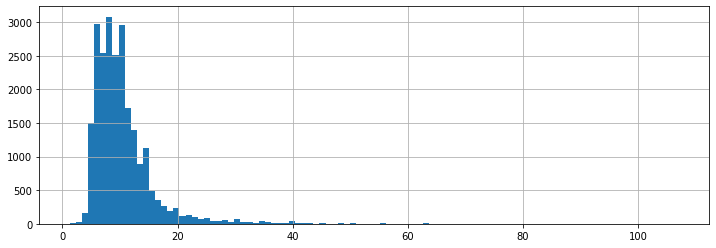

In [94]:
# смотрим общий график
df['kitchen_area'].hist(figsize = (12,4), bins = 100);

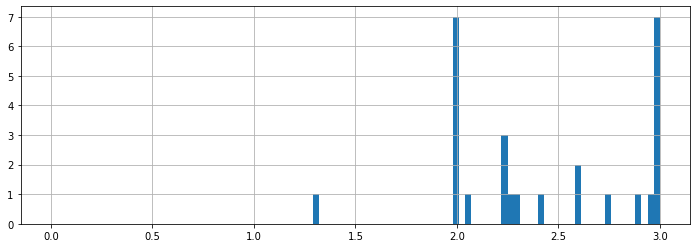

In [95]:
# смотрим кухни до 3 кв. метров
df['kitchen_area'].hist(figsize = (12,4), bins = 100, range = (0,3));

Видим, что у нас  есть  очень маленькие площади кухни, до 3 кв. метров  значения не адекватные.  Заменим их также как маленькие значения в жилой площади.

In [96]:
# срез маленьких по площади кухни квартир
df.query('kitchen_area < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000,27.00,2017-07-10,1,2.75,23,18.00,18,False,...,2.00,0,Санкт-Петербург,22131.00,17459.00,0.00,nan,1.00,411.00,10.00
6260,9,3100000,24.00,2018-06-25,2,3.00,5,16.00,5,False,...,2.00,0,Санкт-Петербург,31960.00,4914.00,2.00,426.00,1.00,936.00,54.00
7948,3,5967734,66.40,2017-02-07,2,2.65,4,44.40,2,False,...,2.89,0,Санкт-Петербург,44870.00,20802.00,0.00,nan,0.00,nan,335.00
8727,9,2200000,18.40,2018-08-20,1,2.52,3,14.00,3,False,...,2.40,0,Пушкин,20710.00,30687.00,0.00,nan,1.00,155.00,59.00
9135,17,2920000,23.29,2018-12-12,1,2.65,3,21.00,1,False,...,2.00,0,Санкт-Петербург,19506.00,4008.00,0.00,nan,2.00,45.00,107.00
9409,5,2100000,16.00,2017-12-10,1,2.65,6,13.00,1,False,...,2.76,0,Санкт-Петербург,20735.00,2111.00,2.00,228.00,3.00,72.00,3.00
11030,6,5350000,32.00,2016-04-20,1,2.65,14,16.00,10,False,...,2.00,0,Санкт-Петербург,19008.00,3953.00,0.00,nan,1.00,69.00,210.00
12037,5,1900000,15.00,2018-06-27,1,2.50,5,8.50,1,False,...,2.59,0,Сосновый Бор,nan,nan,nan,nan,nan,nan,45.00
16360,2,2720000,25.70,2017-10-30,1,2.65,19,22.60,11,False,...,2.00,0,Санкт-Петербург,14472.00,13268.00,0.00,nan,0.00,nan,109.00
16941,9,1550000,15.00,2018-08-21,1,2.70,9,8.50,1,False,...,2.59,0,Санкт-Петербург,51048.00,16376.00,0.00,nan,1.00,1079.00,42.00


In [97]:
# меняем некорректную площадь кухни на подходящую 
df.loc[df['kitchen_area'] < 3, 'kitchen_area'] = df['total_area'] - df['kitchen_area'] - df['total_area']*part_other

Для удобства округлим значения в столбце до десятых

In [98]:
# округляем значения до десятых
df['kitchen_area'] = round(df['kitchen_area'],1)

In [99]:
# числовое описание столбца
df['kitchen_area'].describe()

count   23537.00
mean       10.52
std         5.95
min         3.00
25%         7.00
50%         9.00
75%        12.00
max       107.00
Name: kitchen_area, dtype: float64

In [100]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,поселок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.20,9,False,...,27.40,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Заменили пропуски и некорректные значения в столбцах на логически подходящие.  В квартирах студиях пропуски в столбце 'kitchen_area' не меняли, так как в таких квартирах нет отдельной кухни, в этом столбце 147 пропусков.

#### Столбец  'days_exposition'

In [101]:
# Смотрим уникальные значения
df['days_exposition'].value_counts().sort_index(ascending=True)

1.00         1
2.00         3
3.00       158
4.00       176
5.00       152
6.00       124
7.00       234
8.00       138
9.00       143
10.00      127
11.00      135
12.00      108
13.00      127
14.00      148
15.00      126
16.00      100
17.00      116
18.00      129
19.00      121
20.00      139
21.00      124
22.00      125
23.00      112
24.00      116
25.00       83
26.00      104
27.00      110
28.00      126
29.00      122
30.00      208
31.00       66
32.00       90
33.00       88
34.00      115
35.00      120
36.00       90
37.00       96
38.00       79
39.00       81
40.00       93
41.00       76
42.00      115
43.00      107
44.00      138
45.00      880
46.00       91
47.00       77
48.00       78
49.00       70
50.00       61
51.00       52
52.00       84
53.00       81
54.00      110
55.00       75
56.00       86
57.00       74
58.00       72
59.00      106
60.00      538
61.00      109
62.00       74
63.00       99
64.00       88
65.00       74
66.00       70
67.00     

In [102]:
# смотрим количество пропусков
df['days_exposition'].isna().sum()

3181

 В этом столбце  указаны данные о том сколько дней было размещено объявление (от публикации до снятия).  Предположительно пропуски в столбцах означают что объявление ещё не снято с публикации, квартира на момент  взятия данных ещё не проданы. Оставим  пропуски как есть.

#### Столбцы 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest ponds_around3000', 'ponds_nearest'

По вводным данным нам известно, что  есть два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [103]:
# смотрим количество пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              147
balcony                     0
locality_name               0
airports_nearest         5540
cityCenters_nearest      5517
parks_around3000         5516
parks_nearest           15614
ponds_around3000         5516
ponds_nearest           14585
days_exposition          3181
dtype: int64

Во всех столбцах примерно одинаковое количество пропусков, кроме столбца `parks_nearest` и `ponds_nearest` в них расстояние до ближайщего парка и водоема , предположительно большое количество пропусков в этих столбцах связанно с тем, что  до парка и водоема расстояние автомотически не получено из-за их отсутствия рядом с населенным пунктом. Расссмотрим детальнее.

In [104]:
# Смотрим строки с пропусками
df[df['airports_nearest'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской поселок Янино-1,nan,nan,nan,nan,nan,nan,55.00
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.40,26,False,...,8.80,0,поселок Мурино,nan,nan,nan,nan,nan,nan,189.00
12,10,3890000,54.00,2016-06-30,2,2.65,5,30.00,5,False,...,9.00,0,Сертолово,nan,nan,nan,nan,nan,nan,90.00
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,False,...,11.00,2,деревня Кудрово,nan,nan,nan,nan,nan,nan,60.00
30,12,2200000,32.80,2018-02-19,1,2.65,9,18.60,2,False,...,5.70,0,Коммунар,nan,nan,nan,nan,nan,nan,63.00
37,10,1990000,45.80,2017-10-28,2,2.50,5,26.00,1,False,...,7.90,0,поселок городского типа Красный Бор,nan,nan,nan,nan,nan,nan,196.00
38,10,3150000,40.00,2018-03-29,1,2.75,18,16.30,9,False,...,11.60,0,поселок Мурино,nan,nan,nan,nan,nan,nan,103.00
47,17,3600000,56.10,2018-10-18,3,2.65,4,42.50,3,False,...,5.70,1,Гатчина,nan,nan,nan,nan,nan,nan,179.00
60,3,2740000,35.00,2018-01-01,1,2.65,12,19.90,8,False,...,6.00,0,поселок Мурино,nan,nan,nan,nan,nan,nan,11.00
62,0,4800000,78.60,2017-09-17,3,2.80,9,48.80,5,False,...,11.90,2,Сертолово,nan,nan,nan,nan,nan,nan,5.00


По полученным данным видим, что картографические данные пропущены без привязки к населенному пункту, встречаются и в самом Санкт-Петербурге. Восстановить или заменить пропуски не получится, недостаточно данных, оставим все как есть.

Проверим столбцы на аномальные значения

In [105]:
# числовое описание столбца
df['airports_nearest'].describe()

count   18144.00
mean    28794.71
std     12634.03
min         0.00
25%     18581.00
50%     26726.00
75%     37284.00
max     84869.00
Name: airports_nearest, dtype: float64

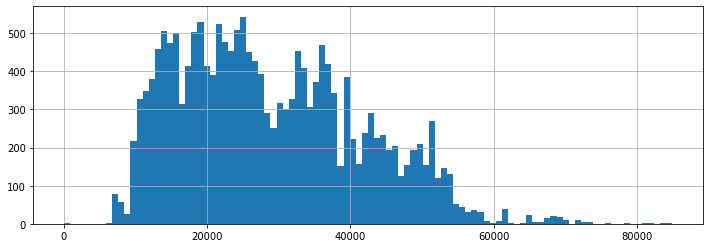

In [106]:
# смотрим график
df['airports_nearest'].hist(figsize = (12,4), bins = 100);

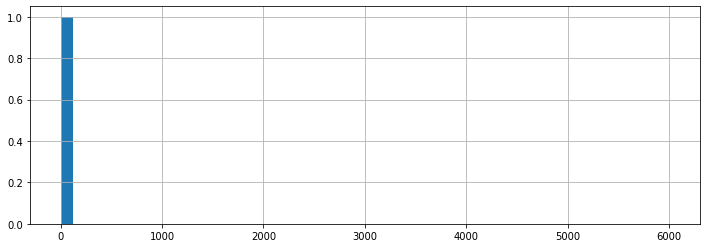

In [107]:
# смотрим маленькие значения
df['airports_nearest'].hist(figsize = (12,4), range=(0,6000),bins=50);

Видим, что есть значение "0", посмотрим эти значения

In [108]:
# строки с маленьким значением
df.query('airports_nearest < 6000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21075,0,7000000,34.70,2018-09-23,1,2.70,9,19.80,3,False,...,6.00,2,Санкт-Петербург,0.00,22801.00,0.00,nan,0.00,nan,60.00


Всего 1 строка заменим её на NaN

In [109]:
# Меняем значение"0" на NaN
df.loc[df['airports_nearest'] < 1, 'airports_nearest'] = np.nan

Расстояние измеряется в метрах, заменим тип данных на целочисленный

In [110]:
# меняем тип данных
df['airports_nearest'] = df['airports_nearest'].astype('Int64')

**Столбец `cityCenters_nearest`**

In [111]:
# числовое описание стлобца
df['cityCenters_nearest'].describe()

count   18167.00
mean    14195.04
std      8609.20
min       181.00
25%      9238.00
50%     13101.00
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

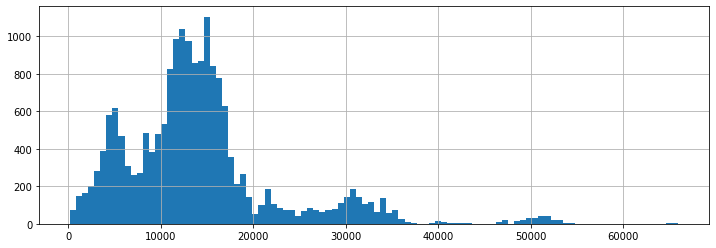

In [112]:
# смотрим график
df['cityCenters_nearest'].hist(figsize = (12,4), bins = 100);

В этом столбце аномальных значений нет.

**Столбец `parks_around3000`**

In [113]:
# числовое описание столбца
df['parks_around3000'].describe()

count   18168.00
mean        0.61
std         0.80
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         3.00
Name: parks_around3000, dtype: float64

In [114]:
# смотрим уникальные значения
df['parks_around3000'].value_counts()

0.00    10102
1.00     5675
2.00     1745
3.00      646
Name: parks_around3000, dtype: int64

Большинство значений "0" вероятно - если парка в радиусе 3 км нет, ставился "0",  можно заменить пропуски в этом столбце на "0".

In [115]:
# Меняем пропуски на "0"
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [116]:
# меняем тип данных на целочисленный
df['parks_around3000'] = df['parks_around3000'].astype('int')

**Столбец `parks_nearest`**

In [117]:
# числовое описание столбца
df['parks_nearest'].describe() 

count   8070.00
mean     490.74
std      342.43
min        1.00
25%      288.00
50%      454.50
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

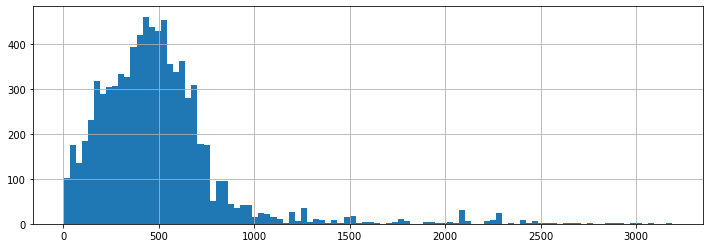

In [118]:
# смотрим график
df['parks_nearest'].hist(figsize = (12,4), bins = 100);

In [119]:
# меняем тип данных 
df['parks_nearest'] = df['parks_nearest'].astype('Int64')

В этом столбце аномальных значений нет.

**Столбец `ponds_around3000`**

In [120]:
# числовое описание столбца
df['ponds_around3000'].describe()

count   18168.00
mean        0.77
std         0.94
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         3.00
Name: ponds_around3000, dtype: float64

In [121]:
# смотрим уникальные значения
df['ponds_around3000'].value_counts()

0.00    9069
1.00    5714
2.00    1888
3.00    1497
Name: ponds_around3000, dtype: int64

Также как и в столбце `parks_around3000`,  большинство значений "0", заменим пропуски на "0"

In [122]:
# Меняем пропуски на "0"
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [123]:
# меняем тип данных на целочисленный
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

**Столбец `ponds_nearest`**

In [124]:
# числовое описание столбца
df['ponds_nearest'].describe() 

count   9099.00
mean     518.15
std      277.74
min       13.00
25%      294.00
50%      503.00
75%      730.00
max     1344.00
Name: ponds_nearest, dtype: float64

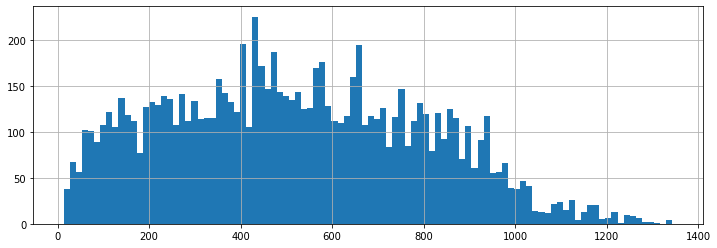

In [125]:
# смотрим график
df['ponds_nearest'].hist(figsize = (12,4), bins = 100);

In [126]:
# меняем тип данных на целочисленный
df['ponds_nearest'] = df['ponds_nearest'].astype('Int64')

Аномальных значений нет

#### Поиск дубликатов

In [127]:
df.duplicated().sum()
# смотрим количество дубликатов

0

Явных дубликатов не найдено.Посмотрим есть ли дубликаты по нескольким столбцам, по которым  совпадения маловероятны.

In [128]:
df[df[['total_images', 'last_price','first_day_exposition','total_area']].duplicated(keep=False)].sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9658,1,2533531,42.50,2016-09-08,1,2.56,18,19.80,7,False,...,7.30,0,Никольское,NaN,nan,0,NaN,0,NaN,627.00
18417,1,2533531,42.50,2016-09-08,1,2.56,18,20.00,10,False,...,7.30,0,Никольское,NaN,nan,0,NaN,0,NaN,627.00
19044,3,4370000,38.00,2016-06-23,1,2.65,9,19.50,1,False,...,6.60,0,Санкт-Петербург,27103,7640.00,1,624,0,NaN,620.00
19317,3,4370000,38.00,2016-06-23,1,2.65,9,21.60,2,False,...,6.60,0,Санкт-Петербург,27103,7640.00,1,624,0,NaN,620.00
10096,10,4400000,44.00,2017-11-22,1,2.65,17,17.00,14,False,...,13.00,2,Санкт-Петербург,42901,9267.00,0,NaN,0,NaN,71.00
21132,10,4400000,44.00,2017-11-22,2,2.65,9,27.00,8,False,...,6.00,1,Санкт-Петербург,49917,16755.00,1,235,0,NaN,72.00
14734,10,5142565,54.65,2018-10-01,2,2.65,5,26.00,3,False,...,9.40,0,Санкт-Петербург,47303,25866.00,1,251,1,350,145.00
18616,10,5142565,54.65,2018-10-01,2,2.65,5,26.00,5,False,...,9.40,0,Санкт-Петербург,47303,25866.00,1,251,1,350,145.00


Итак, видим что есть совпадения. В строках 9658 и 18417 немного различается жилая площадь и этаж, скорее всего разные квартиры. Строки 19044 и 19317 - также различия в жилой площади и этаже, остальные также отличаются в жилой площади и этаже. Будем считать  эти квартиры разными квартирами.

In [129]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23684 entries, 0 to 23685
Data columns (total 22 columns):
total_images            23684 non-null int64
last_price              23684 non-null int32
total_area              23684 non-null float64
first_day_exposition    23684 non-null datetime64[ns]
rooms                   23684 non-null int64
ceiling_height          23684 non-null float64
floors_total            23598 non-null Int64
living_area             23684 non-null float64
floor                   23684 non-null int64
is_apartment            23684 non-null bool
studio                  23684 non-null bool
open_plan               23684 non-null bool
kitchen_area            23537 non-null float64
balcony                 23684 non-null int32
locality_name           23684 non-null object
airports_nearest        18143 non-null Int64
cityCenters_nearest     18167 non-null float64
parks_around3000        23684 non-null int32
parks_nearest           8070 non-null Int64
ponds_around3000    

#### Результат предобработки данных

Предобработка обнаружила несколько проблем в данных:
- пропущенные значения
- аномальные значения
- разные формы написания слова поселок.

В столбце `ceiling_height` пропуски заменены медианами, аномальные значения удалены. Предположительные опечатки исправили на логически верные значения.

В столбцах `living_area` и `kitchen_area` пропуски заменены на медианные, аномально маленькие значения удалены, так же учтены квартиры студии их 147, - в строках где студии в столбце `kitchen_area` оставлено NaN. Изменили тип данных в числовых столбцах и столбце с датой.

В столбце `last_price` были аномальные значения как сильно маленькие так и сильно большие. Удалили их 

В столбце `rooms` - присутствовали значения 0 комнат. Заменили их на подходящиее значение. 

В столбце `locality_name` - были обнаружены значения где "поселок" написан с буквой "ё" - исправлено.

В столбцах с расстояниями airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest было обнаружено, что значения отсутствуют во всех 4 столбцах. Поэтому заполнить пропуски получилось по минимуму,  только в двух столбцах.

## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

In [130]:
# добавляем столбец с ценой кв. метра и сразу меняем тип данных
df['price_square_meter'] = (df['last_price'] / df['total_area']).astype(int)

In [131]:
# смотрим таблицу
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863,16028.00,1,482,2,755,nan,120370
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,2,поселок Шушары,12817,18603.00,0,NaN,0,NaN,81.00,82920
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,0,Санкт-Петербург,21741,13933.00,1,90,2,574,558.00,92785
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.20,9,False,...,0,Санкт-Петербург,28098,6800.00,2,84,3,234,424.00,408176
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856,8098.00,2,112,1,48,121.00,100000


### День недели, месяц и год публикации объявления

In [132]:
# добавляем столбец с днём недели пудликации
df['public_day'] = df['first_day_exposition'].dt.weekday

In [133]:
# добавляем столбец  с месяцем публикации
df['public_month'] = df['first_day_exposition'].dt.month

In [134]:
# добавляем столбец с годом публикации
df['public_year'] = df['first_day_exposition'].dt.year

In [135]:
# смотрим таблицу
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,public_day,public_month,public_year
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.00,1,482,2,755,nan,120370,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,18603.00,0,NaN,0,NaN,81.00,82920,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,13933.00,1,90,2,574,558.00,92785,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.20,9,False,...,6800.00,2,84,3,234,424.00,408176,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,8098.00,2,112,1,48,121.00,100000,1,6,2018


### Этаж квартиры; варианты — первый, последний, другой

In [136]:
# Функция возвращает категории этажей
def floor_category(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
# добавляем в новый столбец результат работы функции
df['floor_category'] = df.apply(floor_category, axis=1)

In [137]:
# смотрим уникальные значения в новом столбце
df['floor_category'].value_counts()

другой       17437
последний     3331
первый        2916
Name: floor_category, dtype: int64

### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [138]:
# соотношение жилой и общей площади
df['living_ratio'] = round(df['living_area'] / df['total_area'],2)

In [139]:
# соотношение площади кухни к общей
df['kitchen_ratio'] = round(df['kitchen_area'] / df['total_area'],2)

In [140]:
# смотрим таблицу
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,public_day,public_month,public_year,floor_category,living_ratio,kitchen_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,nan,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,81.00,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574,558.00,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.20,9,False,...,3,234,424.00,408176,4,7,2015,другой,0.57,0.17
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121.00,100000,1,6,2018,другой,0.32,0.41


Добавили все необходимые столбцы

## Исследовательский анализ данных

### Время продажи квартиры

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

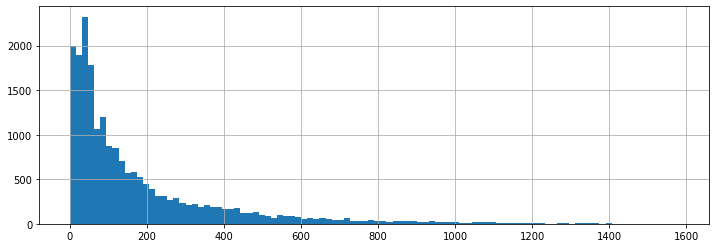

In [141]:
# смотрим общий график
df['days_exposition'].hist(figsize=(12,4), bins=100);

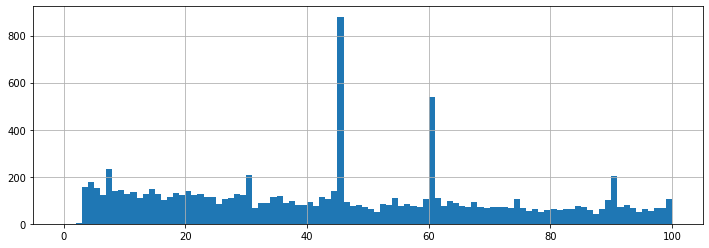

In [142]:
# смотрим значения до 100 дней
df['days_exposition'].hist(range=(0,100),figsize=(12,4), bins=100);

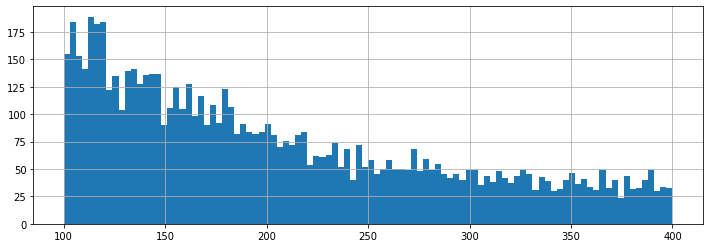

In [143]:
# смотрим значения от 100 дней до 400
df['days_exposition'].hist(range=(100,400),figsize=(12,4), bins=100);

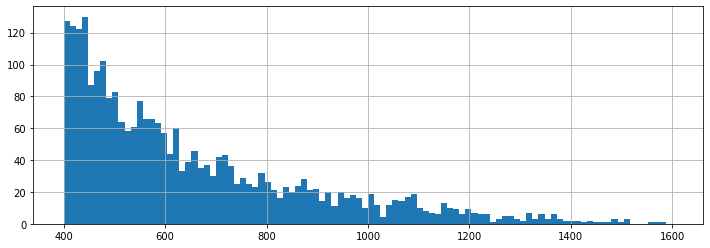

In [144]:
# смотрим значения от 400 дней
df['days_exposition'].hist(range=(400,1600),figsize=(12,4), bins=100);

In [145]:
print('Медиана =', df['days_exposition'].median())
print('Среднее =', df['days_exposition'].mean())

Медиана = 95.0
Среднее = 180.9277178949422


На графиках видим, что есть аномальные выбросы количества объявлений со сроком публикации в 45 и 60 дней, так же наблюдается повышенное значение на 90 днях. Скорее всего это объявления, автоматически снятые с публикации по истечении срока размещения.

Из полученных данных видим, что большее число продаж совершается от 90 до 200 дней примммерно 6-7 месяцев. Это подтверждает среднее значение в 180 дней. Быстрой продажей можно назвать продажи до 45 дней -первый пик 2 гистограммы. Необычайно долгие продажи начинаются от 2 лет - нижняя гистограмма

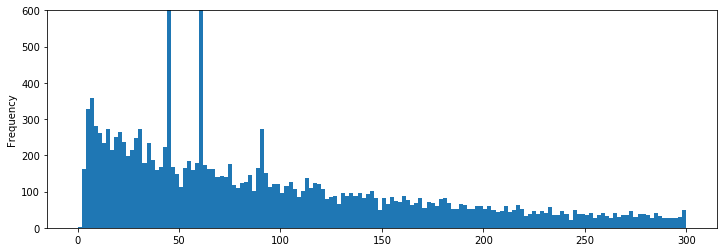

In [146]:
# смотрим значения до 300 дней с ограничением по оси y для исключения влияния выбросов
df['days_exposition'].plot.hist(ylim=(0,600), range=(0,300),figsize=(12,4), bins=150);

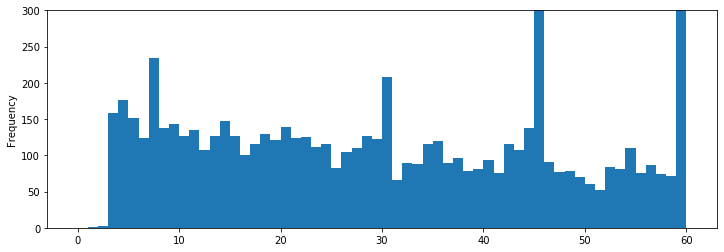

In [147]:
# смотрим значения до 60 дней с ограничением по оси y для исключения влияния выбросов
df['days_exposition'].plot.hist(ylim=(0,300), range=(0,60),figsize=(12,4), bins=60);

По полученным данным видим, что первые два дня завершённых объявлений практически нет, а начиная с третьего дня их количество уходит в усреднённый максимум, и, затем, происходит плавное снижение на протяжении всего срока объявлений без явных скачков, за исключением дней, соответствующих завершению определённых периодов(7 дней, 30, 45, 60, 90)  

In [148]:
# числовое описание столбца
df['days_exposition'].describe()

count   20503.00
mean      180.93
std       219.78
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

Можно считать что продажи прошли очень быстро, если  объявление было снято с публикации до 45 дней, а если объевление снято после 240 дней, тогда продажи прошли необычно долго. Предположим, что обычно продажа занимает от 95 до 180 дней.

### Зависимость стоимости от различных факторов

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

#### Зависимость цены от площади

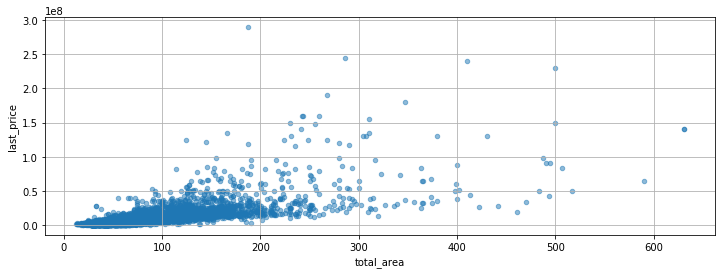

In [149]:
df.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [150]:
# коэффициент корреляции Пирсона
df['last_price'].corr(df['total_area'])

0.7190155492593442

По полученным данным видим, что зависимость цены от площади есть. При возрастании площади, возрастает цена.

#### Зависимость цены от количества комнат

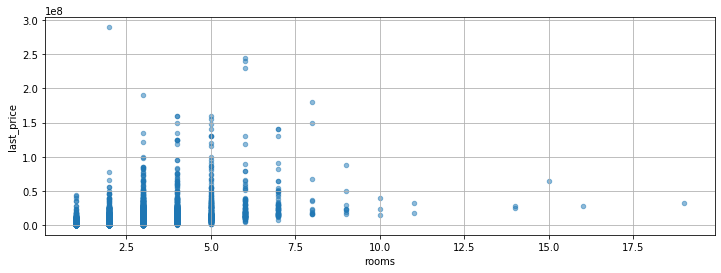

In [151]:
df.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [152]:
# коэффициент корреляции Пирсона
df['last_price'].corr(df['rooms'])

0.4191332669000307

Видим, что зависимость цены от количества комнат есть, это и понятно, чем больше комнат, тем больше площадь, тем выше цена, цена возрастает от 1 до 3 комнат, далее начинает постепенно снижаться. Как показывает  жизненный опыт продать квартиру с большим числом комнат сложнее, так как за неё необходимо платить большую коммунальную плату, поэтому люди чаще предпочитают квартиры не большие.

#### Зависимость цены от удалённости от центра

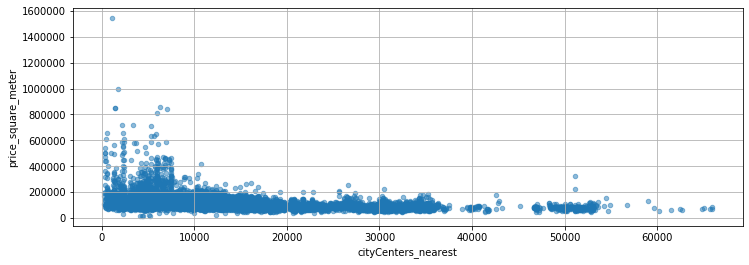

In [153]:
df.plot(x='cityCenters_nearest', y='price_square_meter', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [154]:
# коэффициент корреляции Пирсона
df['price_square_meter'].corr(df['cityCenters_nearest'])

-0.33818913741387785

Видим, что зависимость цены за квадратный метр от растояния до центра есть,  ближе к центру квартиры значительно дороже остальных, на расстоянии 5-6 км  есть не большой подьем стоимости, потом цена снижается. Также можно отметить что на расстоянии 45-55 км большое количество объевлений, по карте там Гатчина. 

#### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

In [155]:
# Вычислим среднюю цену в каждой категории 
category_floor_mean = df.groupby('floor_category')['last_price'].mean();

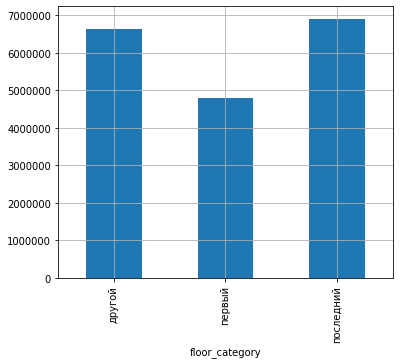

In [156]:
category_floor_mean.plot(x='floor_category', y='last_price', kind='bar', grid=True, figsize=(6,5));

По графику видим - первый этаж самый дешёвый, средняя цена ниже всех. Полы  холодные видимо, не любят первый этаж))) Более предпочтителен последний этаж, не большая разница с другими этажами. Зависимость цены от этажа прослеживается.

#### Изучите зависимость от даты размещения: дня недели, месяца и года.

In [157]:
# Вычислим среднюю цену в каждой категории 
public_day_median = df.groupby('public_day')['last_price'].median();

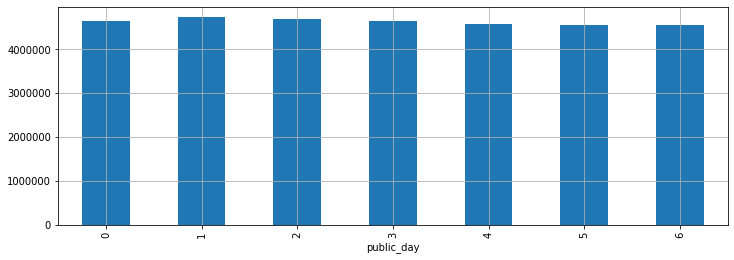

In [158]:
public_day_median.plot(x='public_month', y='last_price', kind='bar', grid=True, figsize=(12,4));

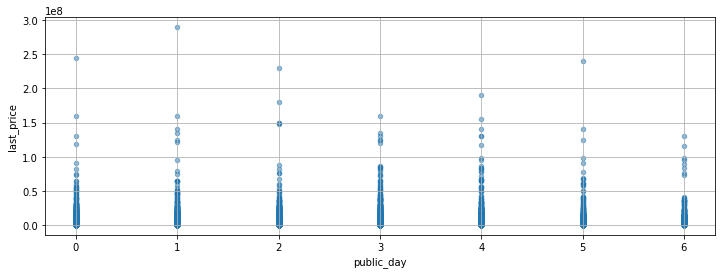

In [159]:
df.plot(x='public_day', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [160]:
# коэффициент корреляции Пирсона
df['last_price'].corr(df['public_day'])

-0.002635122062637365

In [161]:
# Вычислим среднюю цену в каждой категории 
public_month_median = df.groupby('public_month')['last_price'].median();

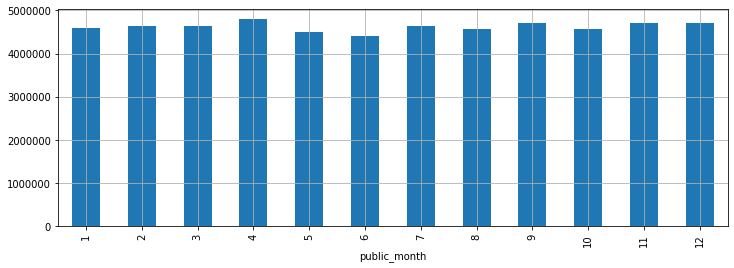

In [162]:
public_month_median.plot(x='public_month', y='last_price', kind='bar', grid=True, figsize=(12,4));

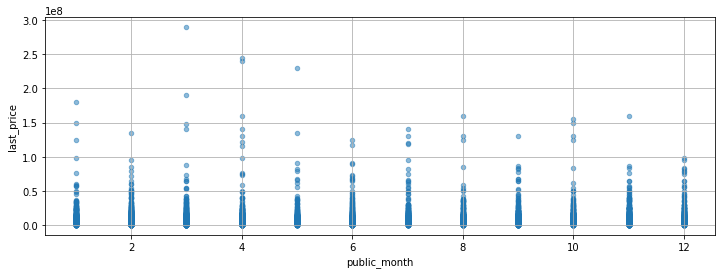

In [163]:
df.plot(x='public_month', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [164]:
# коэффициент корреляции Пирсона
df['last_price'].corr(df['public_month'])

-0.001380622983316004

In [165]:
# Вычислим среднюю цену в каждой категории 
public_year_median = df.groupby('public_year')['last_price'].median();

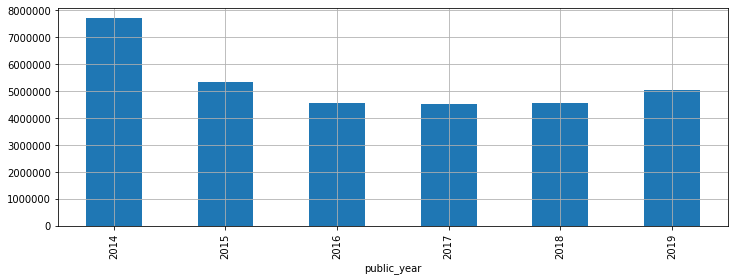

In [166]:
public_year_median.plot(x='public_year', y='last_price', kind='bar', grid=True, figsize=(12,4));

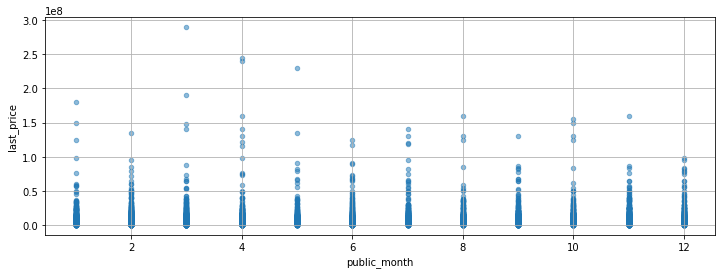

In [167]:
df.plot(x='public_month', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [168]:
# коэффициент корреляции Пирсона
df['last_price'].corr(df['public_year'])

-0.0511545202796594

Зависимость цены от дня недели и месяца размещения объявления не прослеживается. Видим, что есть зависимость цены от года максимальная цена была в 2014 году, далее цена начала снижаться до 2016 года. В 16-17-18 цена практически не менялась, в 19 начала расти.

**Вывод**

По полученным данным видим, что больше всего на стоимость квартиры влияет её площадь,  при возрастании площади, возрастает цена. Среднее влияние оказывает удаленность от центра и количество комнат особенно хорошо видна зависимость на отрезке 1-3 комнаты. Также надо отметить, что есть зависимость от этажа - средняя цена квартир на первом этаже заметно ниже, чем на других и последнем этаже. Дата размещения не оказывает влияния на цену.

### Анализ по населенным пунктам

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

Сгруппируем данные по количеству объявлений и стоимости квадратного метра

In [169]:
top10_locality_name = df.groupby('locality_name')['price_square_meter'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
top10_locality_name.columns = ['count', 'price_square_meter']
top10_locality_name

,count,price_square_meter
locality_name,,
Санкт-Петербург,15708,114501.86
поселок Мурино,555,85653.16
поселок Шушары,440,78676.90
Всеволожск,398,68654.01
Пушкин,369,103125.37
Колпино,338,75424.15
поселок Парголово,327,90175.49
Гатчина,307,68745.69
деревня Кудрово,299,92473.09


Найдем населённый пункт с самой низкой стоимостью за квадратный метр.

In [170]:
# Населённый пункт, где cамая низкая стоимость жилья
top10_locality_name.loc[top10_locality_name['price_square_meter']==top10_locality_name['price_square_meter'].min()]


,count,price_square_meter
locality_name,,
Выборг,237,58141.49


Теперь с самой высокой стоимостью за квадратный метр

In [171]:
# Населённый пункт, где cамая высокая стоимость жилья
top10_locality_name.loc[top10_locality_name['price_square_meter']==top10_locality_name['price_square_meter'].max()]

,count,price_square_meter
locality_name,,
Санкт-Петербург,15708,114501.86


Самое большое количество объявлений в Санкт- Петербурге в нем же и самые дорогие квартиры. Самые дешёвые квартиры в выборке из 10 самых популярных населённых пунктов в Выборге.

### Поиск центральной зоны

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [172]:
locality_spb = df.loc[df['locality_name']=='Санкт-Петербург',['last_price', 'cityCenters_nearest']].reset_index(drop=True) 
locality_spb['cityCenters_km'] = (locality_spb['cityCenters_nearest']/1000).round()
locality_spb.head(10)

,last_price,cityCenters_nearest,cityCenters_km
0,13000000,16028.00,16.00
1,5196000,13933.00,14.00
2,64900000,6800.00,7.00
3,10000000,8098.00,8.00
4,7915000,11634.00,12.00
5,5400000,15008.00,15.00
6,5050000,13878.00,14.00
7,4650000,14259.00,14.00
8,6700000,10698.00,11.00
9,4180000,14616.00,15.00


In [173]:
prices_km = locality_spb.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
prices_km.head(10)

,last_price
cityCenters_km,
0.00,31449115.85
1.00,19590002.09
2.00,16547181.49
3.00,11126581.00
4.00,12213019.38
5.00,14188456.34
6.00,15248205.13
7.00,14775152.59
8.00,9260095.71


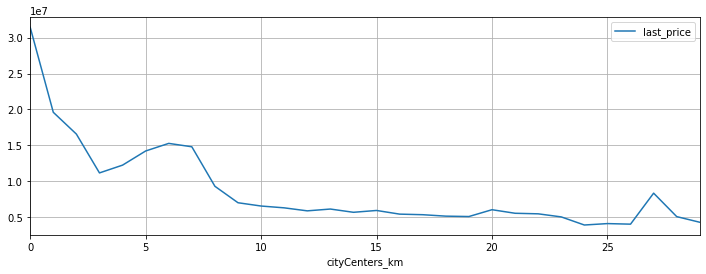

In [174]:
prices_km.plot(grid=True, figsize=(12,4));

По полученным данным видим, что чем ближе к центру тем выше цена, квартиры на расстоянии 0-2 км  самые дорогие (примерно от 17 до 32 млн), далее идет снижение цены до 12 млн (судя по картам на таком расстоянии появляются как промзоны, так и старые районы советской застройки возможно из-за этого снижение цен), а затем наблюдается повышение цен на расстоянии от 5 до 7 км от центра от 12 до 15 млн - из-за появления на этом расстоянии современной элитной застройки - ближе к центру нельзя - историческая зона. Определим границу центра все что в радиусе 2 км это "Центр-прям центр" Санкт-Петербурга, а центральной зоной можно назвать расстояние до 7 км.


###  Сравнение центра города со всеми объявлениями в городе

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Выделим сигмент квартир в центре и по всему городу

In [175]:
# Сегмент квартир в центре
spb_center = df.query('cityCenters_nearest <= 7000 ')
spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,public_day,public_month,public_year,floor_category,living_ratio,kitchen_ratio
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.20,9,False,...,3,234,424.00,408176,4,7,2015,другой,0.57,0.17
24,8,6500000,97.20,2015-10-31,2,2.65,3,46.50,1,False,...,3,124,265.00,66872,5,10,2015,первый,0.48,0.20
35,6,15500000,149.00,2017-06-26,5,2.65,5,104.00,4,False,...,1,779,644.00,104026,0,6,2017,другой,0.70,0.11
51,7,45000000,161.00,2017-10-17,3,3.20,8,38.00,4,False,...,3,99,541.00,279503,1,10,2017,другой,0.24,0.31
52,20,11795000,136.00,2017-09-22,6,3.00,2,94.00,2,False,...,0,NaN,nan,86727,4,9,2017,последний,0.69,0.08


In [176]:
# Сегмент квартир по всему городу
spb = df.query(' locality_name == "Санкт-Петербург" ') 
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,public_day,public_month,public_year,floor_category,living_ratio,kitchen_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,nan,120370,3,3,2019,другой,0.47,0.23
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574,558.00,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.20,9,False,...,3,234,424.00,408176,4,7,2015,другой,0.57,0.17
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121.00,100000,1,6,2018,другой,0.32,0.41
7,5,7915000,71.60,2019-04-18,2,2.65,24,40.60,22,False,...,0,NaN,nan,110544,3,4,2019,другой,0.57,0.26


Изучим площадь, цену, число комнат, высоту потолков в обоих сегментах.

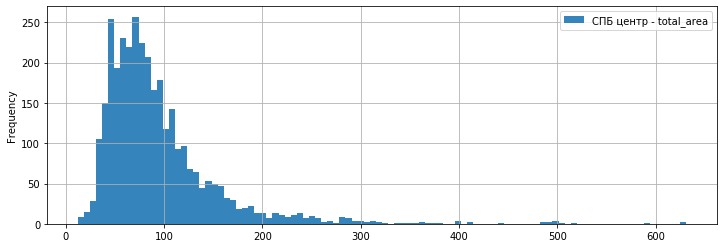

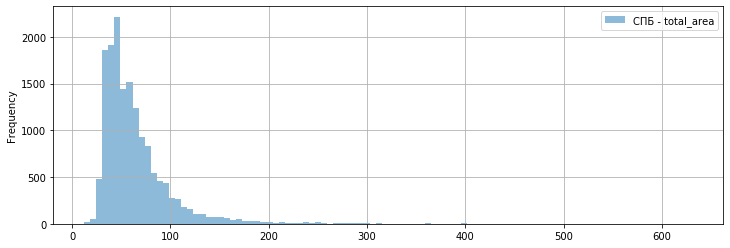

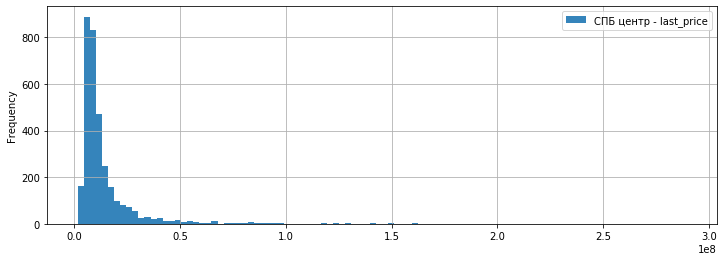

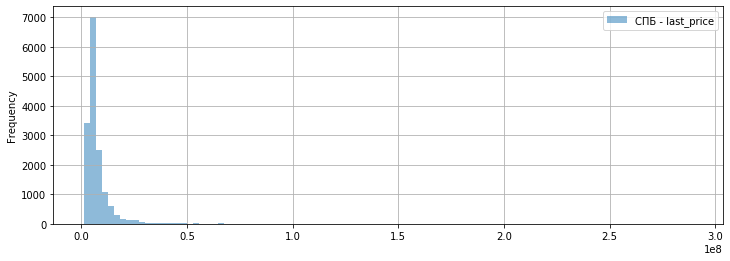

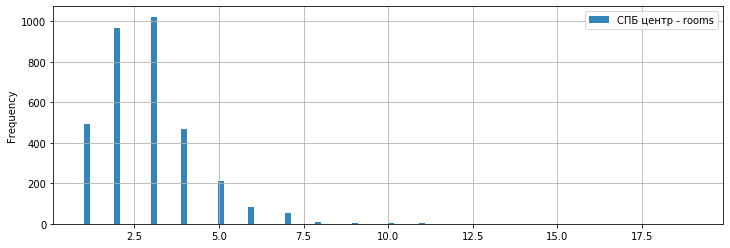

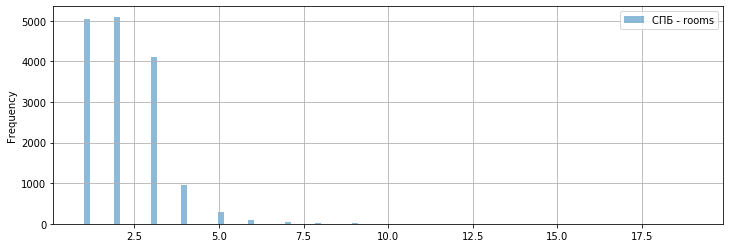

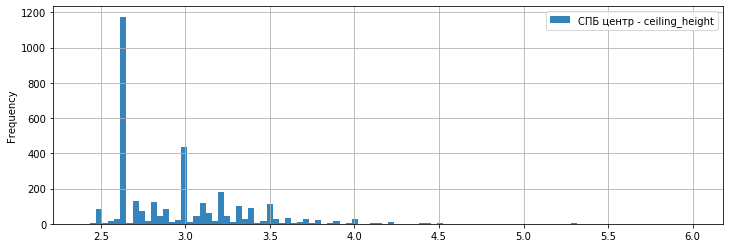

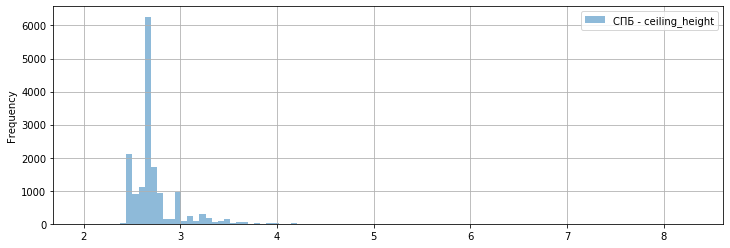

In [177]:
#  Цикл рисует графики для обоих сегментов  по необходимым параметрам
for column in ['total_area','last_price', 'rooms', 'ceiling_height']:
    spb_center.plot(y=column, kind='hist', grid=True, figsize=(12,4),\
                    bins=100, alpha=0.9, legend=True, label='СПБ центр - '+column);
    spb.plot(y=column, kind='hist', grid=True, figsize=(12,4), bins=100, alpha=0.5, legend=True, label='СПБ - '+column);
    plt.show()

По полученным данным видим, что доля квартир с большой площадью в центре значительно выше, чем по всему Санкт-Петербургу, и в центре квартиры дороже. В центральной зане чаще продают 2 и 3 комнатные кварты, по городу 1 и 2 комнатные квартиры. (2 комнатные квартиры любят везде) В центре больше квартир с высокими потолками.

Выделим факторы, которые влияют на стоимость квартиры число комнат, этаж, удалённость от центра, дата размещения объявления, и сравним весь город  и центр

Проверим влияет ли удалённость от центра на стоимость квартиры

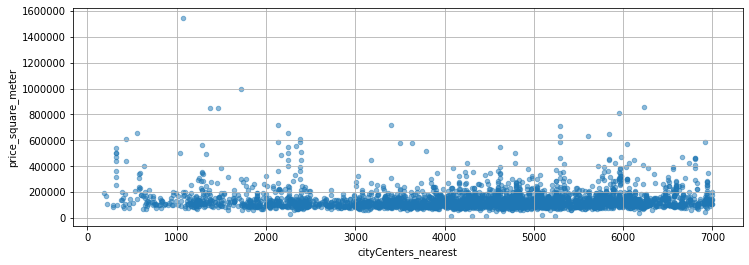

In [178]:
# в центре
spb_center.plot(x='cityCenters_nearest', y='price_square_meter', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [179]:
# коэффициент корреляции Пирсона
spb_center['price_square_meter'].corr(spb_center['cityCenters_nearest'])

-0.017044897934205733

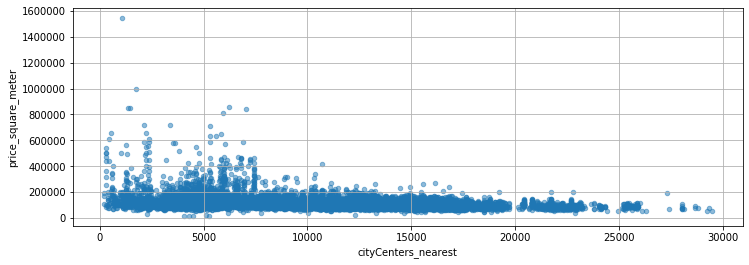

In [180]:
# во всем городе
spb.plot(x='cityCenters_nearest', y='price_square_meter', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [181]:
# коэффициент корреляции Пирсона
spb['price_square_meter'].corr(spb['cityCenters_nearest'])

-0.33139499904401837

Видим, что в центре зависимость центы от растояния практически нет, а вот во всем городе есть.

Проверим влияет ли числокомнат на стоимость квартир.

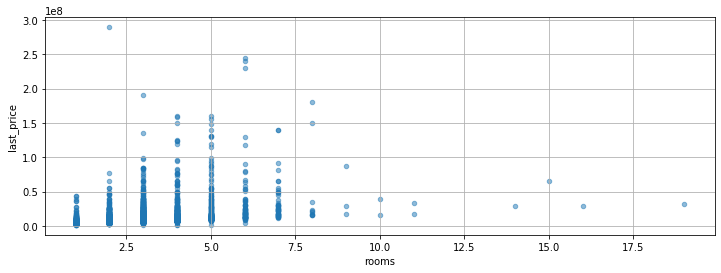

In [182]:
# в центре
spb_center.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [183]:
# коэффициент корреляции Пирсона
spb_center['last_price'].corr(spb_center['rooms'])

0.3609058293778134

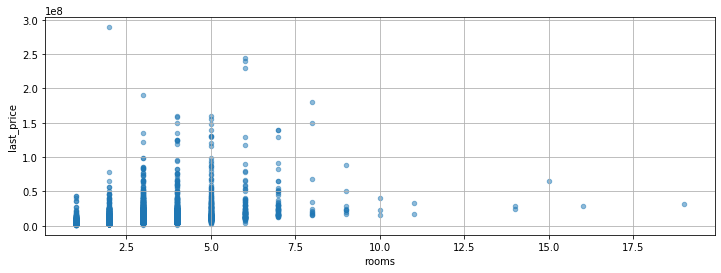

In [184]:
# во всем городе
spb.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [185]:
# коэффициент корреляции Пирсона
spb['last_price'].corr(spb['rooms'])

0.429730754191473

Количество комнат в центре и в городе практически одинаковое в городе чуть-чуть больше.

Проверим влияет ли этаж на стоимость квартир

In [186]:
# Вычислим среднюю цену в каждой категории этажей
category_floor_mean_spb_center = spb_center.groupby('floor_category')['last_price'].mean();

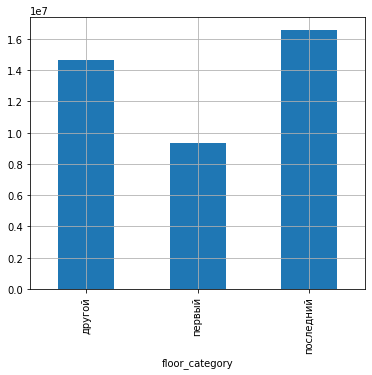

In [187]:
# в центре
category_floor_mean_spb_center.plot(x='floor_category', y='last_price', kind='bar', grid=True, figsize=(6,5));

In [188]:
# Вычислим среднюю цену в каждой категории этажей
category_floor_mean_spb = spb.groupby('floor_category')['last_price'].mean();

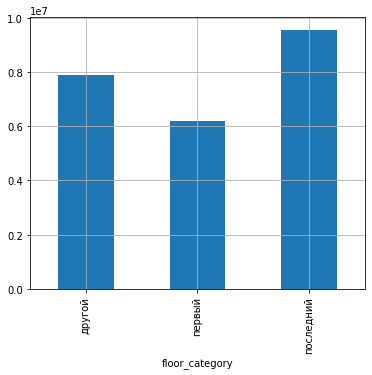

In [189]:
# весь город
category_floor_mean_spb.plot(x='floor_category', y='last_price', kind='bar', grid=True, figsize=(6,5));

Тут разница не наблюдается, также как и по всем квартирам во всех населенных пунктах, в центре Санкт-Петербурга и во всем городе первый этаж самый дешёвый, последний этаж самый дорогой.

Проверим влияет ли дата размещения на стоимость квартиры.

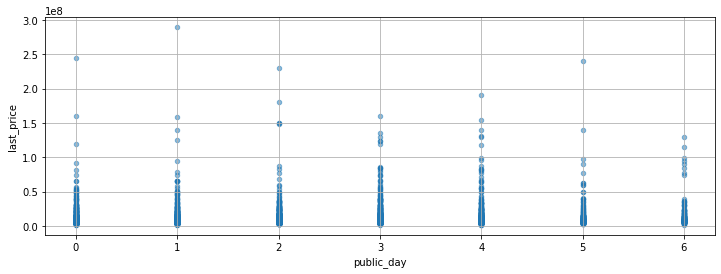

In [190]:
spb_center.plot(x='public_day', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [191]:
# коэффициент корреляции Пирсона
spb_center['last_price'].corr(df['public_day'])

0.018470428469953393

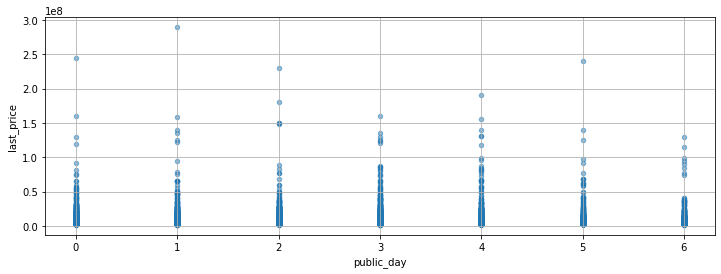

In [192]:
spb.plot(x='public_day', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [193]:
# коэффициент корреляции Пирсона
spb['last_price'].corr(df['public_day'])

0.0020572886530934335

День никак не влияет на стоимость квартиры.

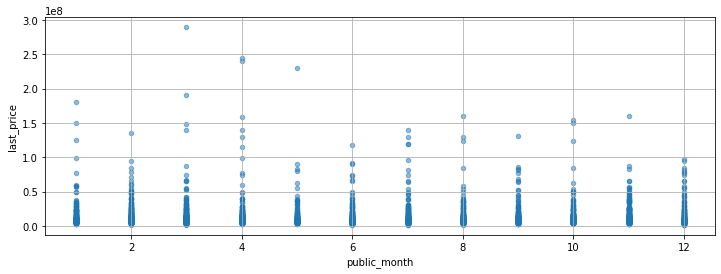

In [194]:
spb_center.plot(x='public_month', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [195]:
# коэффициент корреляции Пирсона
spb_center['last_price'].corr(df['public_month'])

-0.01908325878981345

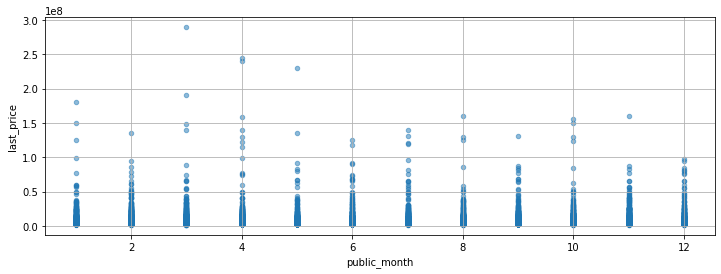

In [196]:
spb.plot(x='public_month', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [197]:
# коэффициент корреляции Пирсона
spb['last_price'].corr(df['public_month'])

-0.006185473124461109

 В каком месяце продают тоже не влияет.

In [198]:
# Вычислим среднюю цену в каждой категории 
spb_center_year_median = spb_center.groupby('public_year')['last_price'].median();

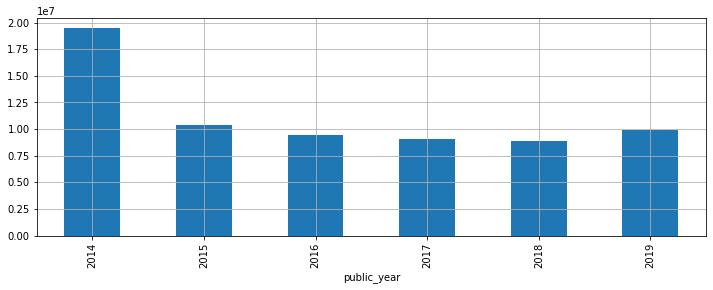

In [199]:
spb_center_year_median.plot(x='public_year', y='last_price', kind='bar', grid=True, figsize=(12,4));

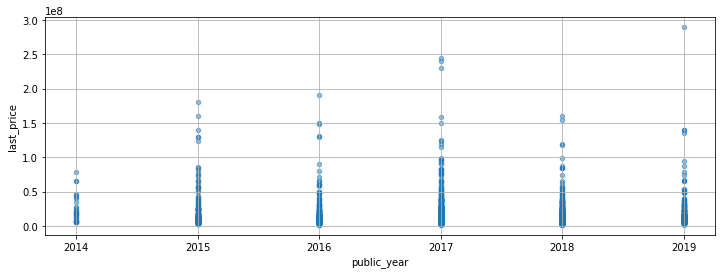

In [200]:
spb_center.plot(x='public_year', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [201]:
# коэффициент корреляции Пирсона
spb_center['last_price'].corr(df['public_year'])

-0.04632530730548348

In [202]:
# Вычислим среднюю цену в каждой категории 
spb_year_median = spb_center.groupby('public_year')['last_price'].median();

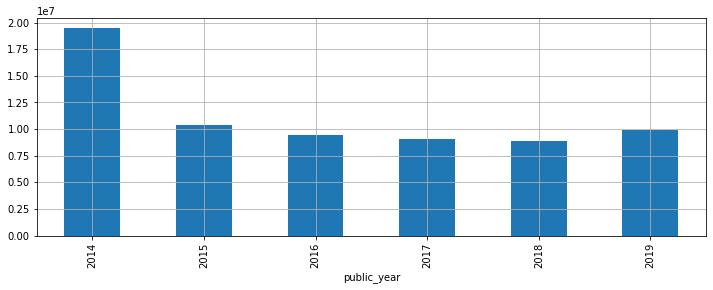

In [203]:
spb_year_median.plot(x='public_year', y='last_price', kind='bar', grid=True, figsize=(12,4));

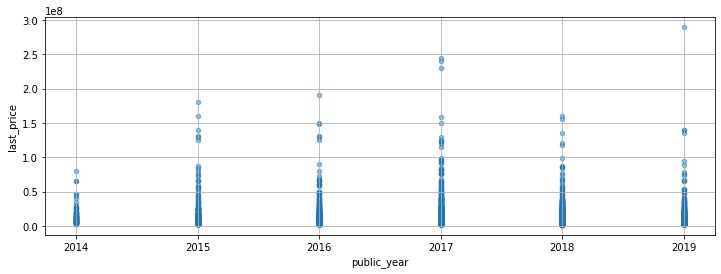

In [204]:
spb.plot(x='public_year', y='last_price', kind='scatter', grid=True, figsize=(12,4), alpha=0.5);

In [205]:
# коэффициент корреляции Пирсона
spb['last_price'].corr(df['public_year'])

-0.05313628205566023

Год также не влияет. Дата размещения объяыления никак не влияет на стоимость квартиры.

## Общий вывод


На основе проведенного анализа  выявили: 

Больше всего квартир продаётся в Санкт-Пербрге - 15708 объявлений из 23684.	

Квартир с площадями 30-45 кв.м встречаются чаще всего- это, похоже, самые популярные 1 и 2-х комнатные.Сделан вывод, что больше всего квартир продаются по цене в диапазоне 2-7 млн. Пик же продажи квартир идет в по цене около 3,8 млн.

Больше всего на стоимость квартиры влияет её площадь, чем больше площадь тем выше стоимость и это понятно. Среднее влияние оказывает удаленность от центра, чем дальше от центра тем дешевли квартиры,  и количество комнат от 1 до 3.Определили что есть зависимость от этажа - первый этаж  по стоимости существенно ниже чем все остальные. Также  определили, что зависимость цены от дня недели и месяца размещения объявления не прослеживается, но есть зависимость цены от года максимальная цена была в 2014 году, далее цена начала снижаться до 2016 года. В 16-17-18 цена практически не менялась, в 19 начала расти.

Определили центральную зону Санкт-Петербурга до 7 км. От 0 до 2 км -  это "Самый центр" тут самые  дорогие квартиры примерно от 17 до 32 млн, далее идет снижение цены до 12 млн (судя по картам на таком расстоянии появляются как промзоны, так и старые районы советской застройки возможно из-за этого снижение цен), а затем наблюдается повышение цен на расстоянии от 5 до 7 км от центра от 12 до 15 млн - из-за появления на этом расстоянии современной элитной застройки - ближе к центру нельзя - историческая зона. 

В центре чаще продают кварты с большей площедью, чем во всем городе. Стоимость квартир в центре выше, чем во всем городе. 
В Центре чаще продают 2 и 3 комнатные квартиры, а по Городу  1-2 комнатные. 
Если в Городе есть зависимость от расстояния до центра, то в Центре такой зависимости нет. Центр есть центр. 
